In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv('D:\\빅데이터분석과정\\H백화점고객성별예측\\train.csv', encoding='cp949')
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [3]:
test = pd.read_csv('D:\\빅데이터분석과정\\H백화점고객성별예측\\test.csv', encoding='cp949')
test.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,수입명품
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,스포츠


In [4]:
trainc = train.copy()

In [5]:
testc = test.copy()

In [6]:
trainc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [7]:
trainc.isnull().sum()

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [8]:
testc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    4052 non-null   float64
 10  겨울_구매건수    4089 non-null   float64
 11  봄_구매건수     4319 non-null   float64
 12  여름_구매건수    4009 non-null   float64
 13  아침_구매건수    3608 non-null   float64
 14  저녁_구매건수    3975 non-null   float64
 15  점심_구매건수    4861 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


In [9]:
testc.isnull().sum()

custid          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       948
겨울_구매건수       911
봄_구매건수        681
여름_구매건수       991
아침_구매건수      1392
저녁_구매건수      1025
점심_구매건수       139
주구매코너           0
dtype: int64

In [10]:
##### 결측치 0으로 대체

##### 평균값 또는 최빈값으로 대체하면 [봄, 여름, 가을, 겨울]의 구매건수의 합과
##### [아침, 점심, 저녁]의 구매건수의 합이 맞지 않아서 데이터의 수치가 맞지 않게 됨

In [11]:
col = ['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수',
       '아침_구매건수','저녁_구매건수','점심_구매건수']

In [12]:
trainc[col] = trainc[col].fillna(0)
trainc[col]

,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
0,0.0,9.0,6.0,0.0,0.0,6.0,9.0
1,0.0,5.0,4.0,0.0,3.0,0.0,6.0
2,7.0,17.0,12.0,0.0,10.0,11.0,15.0
3,5.0,8.0,15.0,0.0,0.0,18.0,10.0
4,0.0,0.0,5.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...
4995,13.0,33.0,14.0,33.0,8.0,41.0,44.0
4996,4.0,6.0,6.0,1.0,3.0,0.0,14.0
4997,12.0,6.0,6.0,13.0,16.0,0.0,21.0
4998,6.0,4.0,2.0,1.0,0.0,2.0,11.0


In [13]:
trainc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [14]:
testc[col] = test[col].fillna(0)
testc[col]

,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
0,5.0,4.0,7.0,9.0,13.0,1.0,11.0
1,13.0,8.0,10.0,8.0,4.0,10.0,25.0
2,6.0,7.0,3.0,6.0,3.0,1.0,18.0
3,5.0,15.0,9.0,17.0,0.0,4.0,42.0
4,18.0,0.0,5.0,3.0,0.0,0.0,26.0
...,...,...,...,...,...,...,...
4995,1.0,2.0,2.0,0.0,1.0,1.0,3.0
4996,0.0,5.0,1.0,7.0,0.0,3.0,10.0
4997,4.0,1.0,6.0,1.0,0.0,0.0,12.0
4998,0.0,7.0,4.0,3.0,2.0,4.0,8.0


In [15]:
testc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    5000 non-null   float64
 10  겨울_구매건수    5000 non-null   float64
 11  봄_구매건수     5000 non-null   float64
 12  여름_구매건수    5000 non-null   float64
 13  아침_구매건수    5000 non-null   float64
 14  저녁_구매건수    5000 non-null   float64
 15  점심_구매건수    5000 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


In [16]:
trainc_testc_data = [trainc, testc]
trainc_testc_data

[      custid  gender     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  \
 0         18       0   680100    15   45340      1.7        9    10   
 1         21       0   353450     9   39272      1.2        6     8   
 2         23       0  5671400    36  157539      2.8       22    16   
 3         26       0  1964000    28   70143      1.4       15    14   
 4         35       0   885000     5  177000      6.0        5     2   
 ...      ...     ...      ...   ...     ...      ...      ...   ...   
 4995   49952       1  6666517    93   71683      1.8       27    39   
 4996   49954       0  3112100    17  183065      3.6       10    13   
 4997   49957       1  5852482    37  158175      2.6       14    21   
 4998   49975       1   654498    13   50346      2.5       10     7   
 4999   49993       1  2554723    32   79835      1.7        9    26   
 
       수입상품_구매비율  주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  \
 0          26.7   100.0      0.0      9.0     6.0   

In [17]:
trainc

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,0.0,9.0,6.0,0.0,0.0,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,0.0,5.0,4.0,0.0,3.0,0.0,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,0.0,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,0.0,0.0,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,피혁A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.0,33.0,14.0,33.0,8.0,41.0,44.0,일반식품
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.0,6.0,6.0,1.0,3.0,0.0,14.0,디자이너부띠끄
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,0.0,21.0,화장품
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,0.0,2.0,11.0,피혁A


In [18]:
testc

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,0.0,4.0,42.0,수입명품
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,0.0,5.0,3.0,0.0,0.0,26.0,스포츠
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,104996,670690,5,134138,1.4,5,4,0.0,75.0,1.0,2.0,2.0,0.0,1.0,1.0,3.0,일반식품
4996,104997,628700,13,48362,1.8,10,7,7.7,42.9,0.0,5.0,1.0,7.0,0.0,3.0,10.0,조리욕실
4997,104998,960923,12,80077,1.8,7,7,0.0,42.9,4.0,1.0,6.0,1.0,0.0,0.0,12.0,일반식품
4998,104999,786600,14,56186,1.7,12,9,14.3,55.6,0.0,7.0,4.0,3.0,2.0,4.0,8.0,화장품


In [19]:
trainc['내점당평균구매수'] = trainc['구매건수']/trainc['내점일수']
testc['내점당평균구매수'] = testc['구매건수']/testc['내점일수']

In [20]:
trainc['하루평균구매액'] = trainc['총구매액']/trainc['내점일수']
testc['하루평균구매액'] = testc['총구매액']/testc['내점일수']

In [21]:
trainc['수입상품구매액'] = trainc['총구매액']*(trainc['수입상품_구매비율']/100)
testc['수입상품구매액'] = testc['총구매액']*(testc['수입상품_구매비율']/100)

In [22]:
trainc['주말방문사용액'] = trainc['총구매액']*(train['주말방문비율']/100)
testc['주말방문사용액'] = testc['총구매액']*(testc['주말방문비율']/100)

In [23]:
trainc['평일방문사용액'] = trainc['총구매액'] - (trainc['총구매액']*(train['주말방문비율']/100))
testc['평일방문사용액'] = testc['총구매액'] - (testc['총구매액']*(testc['주말방문비율']/100))

In [24]:
trainc['봄_구매비율'] = trainc['봄_구매건수']/trainc['구매건수']
testc['봄_구매비율'] = testc['봄_구매건수']/testc['구매건수']

In [25]:
trainc['여름_구매비율'] = trainc['여름_구매건수']/trainc['구매건수']
testc['여름_구매비율'] = testc['여름_구매건수']/testc['구매건수']

In [26]:
trainc['가을_구매비율'] = trainc['가을_구매건수']/trainc['구매건수']
testc['가을_구매비율'] = testc['가을_구매건수']/testc['구매건수']

In [27]:
trainc['겨울_구매비율'] = trainc['겨울_구매건수']/trainc['구매건수']
testc['겨울_구매비율'] = testc['겨울_구매건수']/testc['구매건수']

In [28]:
trainc['아침_구매비율'] = trainc['아침_구매건수']/trainc['구매건수']
testc['아침_구매비율'] = testc['아침_구매건수']/testc['구매건수']

In [29]:
trainc['점심_구매비율'] = trainc['점심_구매건수']/trainc['구매건수']
testc['점심_구매비율'] = testc['점심_구매건수']/testc['구매건수']

In [30]:
trainc['저녁_구매비율'] = trainc['저녁_구매건수']/trainc['구매건수']
testc['저녁_구매비율'] = testc['저녁_구매건수']/testc['구매건수']

In [31]:
trainc['브랜드구매비율'] = trainc['구매브랜드종류']/trainc['구매건수']
testc['브랜드구매비율'] = testc['구매브랜드종류']/testc['구매건수']

In [32]:
trainc.head(2)

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주말방문사용액,평일방문사용액,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,아침_구매비율,점심_구매비율,저녁_구매비율,브랜드구매비율
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,680100.00,0.00,0.400000,0.0,0.0,0.600000,0.000000,0.600000,0.4,0.600000
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,132543.75,220906.25,0.444444,0.0,0.0,0.555556,0.333333,0.666667,0.0,0.666667


In [33]:
testc.head(2)

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,...,주말방문사용액,평일방문사용액,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,아침_구매비율,점심_구매비율,저녁_구매비율,브랜드구매비율
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,...,1072968.00,2366032.00,0.28000,0.360000,0.200000,0.160000,0.520000,0.440000,0.04000,0.760000
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,...,429129.63,1643960.37,0.25641,0.205128,0.333333,0.205128,0.102564,0.641026,0.25641,0.461538


In [34]:
trainc.describe()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,주말방문사용액,평일방문사용액,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,아침_구매비율,점심_구매비율,저녁_구매비율,브랜드구매비율
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25200.496600,0.304200,3.360421e+06,34.538400,102564.0746,1.915660,17.368800,18.054800,17.989860,38.571880,...,1.235684e+06,2.124737e+06,0.277697,0.253530,0.229193,0.239580,0.162595,0.601355,0.236049,0.657590
std,14376.680764,0.460114,5.088433e+06,40.109424,79091.0458,0.730558,14.582432,19.369182,19.483598,24.509818,...,2.000302e+06,3.403029e+06,0.224392,0.215658,0.193046,0.208002,0.190562,0.233216,0.227303,0.217649
min,18.000000,0.000000,-1.237971e+06,1.000000,-72822.0000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-3.037088e+05,-1.012660e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067568
25%,12835.750000,0.000000,7.223850e+05,10.000000,54811.0000,1.400000,7.000000,6.000000,5.000000,22.200000,...,2.122871e+05,3.793410e+05,0.131951,0.086769,0.086957,0.090909,0.000000,0.466667,0.047619,0.500000
50%,25345.000000,0.000000,1.806748e+06,21.000000,82201.5000,1.800000,13.000000,12.000000,12.500000,34.850000,...,6.268425e+05,1.064611e+06,0.250000,0.233766,0.210768,0.209601,0.105263,0.619048,0.181818,0.647059
75%,37584.250000,1.000000,4.030409e+06,44.000000,124142.7500,2.200000,24.000000,23.000000,25.000000,50.000000,...,1.492268e+06,2.524802e+06,0.368421,0.357143,0.322312,0.333333,0.241935,0.755436,0.361195,0.818182
max,49993.000000,1.000000,9.286883e+07,491.000000,926117.0000,10.000000,134.000000,249.000000,100.000000,100.000000,...,3.417899e+07,6.168433e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
trainc.loc[trainc['총구매액'] <= 1000000, '총구매액re'] = 0
trainc.loc[(trainc['총구매액'] > 1000000) & (trainc['총구매액'] <= 2000000), '총구매액re'] = 1
trainc.loc[(trainc['총구매액'] > 2000000) & (trainc['총구매액'] <= 3000000), '총구매액re'] = 2
trainc.loc[(trainc['총구매액'] > 3000000) & (trainc['총구매액'] <= 4000000), '총구매액re'] = 3
trainc.loc[(trainc['총구매액'] > 4000000) & (trainc['총구매액'] <= 5000000), '총구매액re'] = 4
trainc.loc[(trainc['총구매액'] > 5000000) & (trainc['총구매액'] <= 6000000), '총구매액re'] = 5
trainc.loc[(trainc['총구매액'] > 6000000) & (trainc['총구매액'] <= 7000000), '총구매액re'] = 6
trainc.loc[(trainc['총구매액'] > 7000000) & (trainc['총구매액'] <= 8000000), '총구매액re'] = 7
trainc.loc[(trainc['총구매액'] > 8000000), '총구매액re'] = 8

In [36]:
testc.loc[testc['총구매액'] <= 1000000, '총구매액re'] = 0
testc.loc[(testc['총구매액'] > 1000000) & (testc['총구매액'] <= 2000000), '총구매액re'] = 1
testc.loc[(testc['총구매액'] > 2000000) & (testc['총구매액'] <= 3000000), '총구매액re'] = 2
testc.loc[(testc['총구매액'] > 3000000) & (testc['총구매액'] <= 4000000), '총구매액re'] = 3
testc.loc[(testc['총구매액'] > 4000000) & (testc['총구매액'] <= 5000000), '총구매액re'] = 4
testc.loc[(testc['총구매액'] > 5000000) & (testc['총구매액'] <= 6000000), '총구매액re'] = 5
testc.loc[(testc['총구매액'] > 6000000) & (testc['총구매액'] <= 7000000), '총구매액re'] = 6
testc.loc[(testc['총구매액'] > 7000000) & (testc['총구매액'] <= 8000000), '총구매액re'] = 7
testc.loc[(testc['총구매액'] > 8000000), '총구매액re'] = 8

In [38]:
trainc['총구매액re'].value_counts()

0.0    1654
1.0    1001
2.0     645
8.0     469
3.0     444
4.0     297
5.0     212
6.0     161
7.0     117
Name: 총구매액re, dtype: int64

In [39]:
testc['총구매액re'].value_counts()

0.0    1645
1.0     983
2.0     661
8.0     505
3.0     435
4.0     283
5.0     212
6.0     155
7.0     121
Name: 총구매액re, dtype: int64

In [40]:
trainc.loc[trainc['평균구매가격'] <= 100000, '평균구매가격re'] = 0
trainc.loc[(trainc['평균구매가격'] > 100000) & (trainc['평균구매가격'] <= 200000), '평균구매가격re'] = 1
trainc.loc[(trainc['평균구매가격'] > 200000) & (trainc['평균구매가격'] <= 300000), '평균구매가격re'] = 2
trainc.loc[(trainc['평균구매가격'] > 300000) & (trainc['평균구매가격'] <= 400000), '평균구매가격re'] = 3
trainc.loc[(trainc['평균구매가격'] > 400000) & (trainc['평균구매가격'] <= 500000), '평균구매가격re'] = 4
trainc.loc[(trainc['평균구매가격'] > 500000) & (trainc['평균구매가격'] <= 600000), '평균구매가격re'] = 5
trainc.loc[(trainc['평균구매가격'] > 600000) & (trainc['평균구매가격'] <= 700000), '평균구매가격re'] = 6
trainc.loc[(trainc['평균구매가격'] > 700000) & (trainc['평균구매가격'] <= 800000), '평균구매가격re'] = 7
trainc.loc[(trainc['평균구매가격'] > 800000), '평균구매가격re'] = 8

In [41]:
testc.loc[testc['평균구매가격'] <= 100000, '평균구매가격re'] = 0
testc.loc[(testc['평균구매가격'] > 100000) & (testc['평균구매가격'] <= 200000), '평균구매가격re'] = 1
testc.loc[(testc['평균구매가격'] > 200000) & (testc['평균구매가격'] <= 300000), '평균구매가격re'] = 2
testc.loc[(testc['평균구매가격'] > 300000) & (testc['평균구매가격'] <= 400000), '평균구매가격re'] = 3
testc.loc[(testc['평균구매가격'] > 400000) & (testc['평균구매가격'] <= 500000), '평균구매가격re'] = 4
testc.loc[(testc['평균구매가격'] > 500000) & (testc['평균구매가격'] <= 600000), '평균구매가격re'] = 5
testc.loc[(testc['평균구매가격'] > 600000) & (testc['평균구매가격'] <= 700000), '평균구매가격re'] = 6
testc.loc[(testc['평균구매가격'] > 700000) & (testc['평균구매가격'] <= 800000), '평균구매가격re'] = 7
testc.loc[(testc['평균구매가격'] > 800000), '평균구매가격re'] = 8

In [49]:
trainc['평균구매가격re'].value_counts()

0.0    3143
1.0    1438
2.0     284
3.0      72
4.0      34
5.0      13
6.0      10
7.0       4
8.0       2
Name: 평균구매가격re, dtype: int64

In [ ]:
# 7

In [43]:
testc['평균구매가격re'].value_counts()

0.0    3181
1.0    1449
2.0     248
3.0      67
4.0      33
8.0       8
6.0       7
5.0       7
Name: 평균구매가격re, dtype: int64

In [44]:
trainc.loc[trainc['주말방문사용액'] <= 1000000, '주말방문사용액re'] = 0
trainc.loc[(trainc['주말방문사용액'] > 1000000) & (trainc['주말방문사용액'] <= 2000000), '주말방문사용액re'] = 1
trainc.loc[(trainc['주말방문사용액'] > 2000000) & (trainc['주말방문사용액'] <= 3000000), '주말방문사용액re'] = 2
trainc.loc[(trainc['주말방문사용액'] > 3000000) & (trainc['주말방문사용액'] <= 4000000), '주말방문사용액re'] = 3
trainc.loc[(trainc['주말방문사용액'] > 4000000) & (trainc['주말방문사용액'] <= 5000000), '주말방문사용액re'] = 4
trainc.loc[(trainc['주말방문사용액'] > 5000000) & (trainc['주말방문사용액'] <= 6000000), '주말방문사용액re'] = 5
trainc.loc[(trainc['주말방문사용액'] > 6000000) & (trainc['주말방문사용액'] <= 7000000), '주말방문사용액re'] = 6
trainc.loc[(trainc['주말방문사용액'] > 7000000) & (trainc['주말방문사용액'] <= 8000000), '주말방문사용액re'] = 7
trainc.loc[(trainc['주말방문사용액'] > 8000000), '주말방문사용액re'] = 8

In [45]:
testc.loc[testc['주말방문사용액'] <= 1000000, '주말방문사용액re'] = 0
testc.loc[(testc['주말방문사용액'] > 1000000) & (testc['주말방문사용액'] <= 2000000), '주말방문사용액re'] = 1
testc.loc[(testc['주말방문사용액'] > 2000000) & (testc['주말방문사용액'] <= 3000000), '주말방문사용액re'] = 2
testc.loc[(testc['주말방문사용액'] > 3000000) & (testc['주말방문사용액'] <= 4000000), '주말방문사용액re'] = 3
testc.loc[(testc['주말방문사용액'] > 4000000) & (testc['주말방문사용액'] <= 5000000), '주말방문사용액re'] = 4
testc.loc[(testc['주말방문사용액'] > 5000000) & (testc['주말방문사용액'] <= 6000000), '주말방문사용액re'] = 5
testc.loc[(testc['주말방문사용액'] > 6000000) & (testc['주말방문사용액'] <= 7000000), '주말방문사용액re'] = 6
testc.loc[(testc['주말방문사용액'] > 7000000) & (testc['주말방문사용액'] <= 8000000), '주말방문사용액re'] = 7
testc.loc[(testc['주말방문사용액'] > 8000000), '주말방문사용액re'] = 8

In [46]:
trainc['주말방문사용액re'].value_counts()

0.0    3172
1.0     943
2.0     410
3.0     193
4.0      94
8.0      69
5.0      58
6.0      37
7.0      24
Name: 주말방문사용액re, dtype: int64

In [47]:
testc['주말방문사용액re'].value_counts()

0.0    3155
1.0     925
2.0     392
3.0     232
4.0     101
8.0      74
5.0      58
7.0      35
6.0      28
Name: 주말방문사용액re, dtype: int64

In [50]:
trainc.loc[trainc['평일방문사용액'] <= 1000000, '평일방문사용액re'] = 0
trainc.loc[(trainc['평일방문사용액'] > 1000000) & (trainc['평일방문사용액'] <= 2000000), '평일방문사용액re'] = 1
trainc.loc[(trainc['평일방문사용액'] > 2000000) & (trainc['평일방문사용액'] <= 3000000), '평일방문사용액re'] = 2
trainc.loc[(trainc['평일방문사용액'] > 3000000) & (trainc['평일방문사용액'] <= 4000000), '평일방문사용액re'] = 3
trainc.loc[(trainc['평일방문사용액'] > 4000000) & (trainc['평일방문사용액'] <= 5000000), '평일방문사용액re'] = 4
trainc.loc[(trainc['평일방문사용액'] > 5000000) & (trainc['평일방문사용액'] <= 6000000), '평일방문사용액re'] = 5
trainc.loc[(trainc['평일방문사용액'] > 6000000) & (trainc['평일방문사용액'] <= 7000000), '평일방문사용액re'] = 6
trainc.loc[(trainc['평일방문사용액'] > 7000000) & (trainc['평일방문사용액'] <= 8000000), '평일방문사용액re'] = 7
trainc.loc[(trainc['평일방문사용액'] > 8000000), '평일방문사용액re'] = 8

In [51]:
testc.loc[testc['평일방문사용액'] <= 1000000, '평일방문사용액re'] = 0
testc.loc[(testc['평일방문사용액'] > 1000000) & (testc['평일방문사용액'] <= 2000000), '평일방문사용액re'] = 1
testc.loc[(testc['평일방문사용액'] > 2000000) & (testc['평일방문사용액'] <= 3000000), '평일방문사용액re'] = 2
testc.loc[(testc['평일방문사용액'] > 3000000) & (testc['평일방문사용액'] <= 4000000), '평일방문사용액re'] = 3
testc.loc[(testc['평일방문사용액'] > 4000000) & (testc['평일방문사용액'] <= 5000000), '평일방문사용액re'] = 4
testc.loc[(testc['평일방문사용액'] > 5000000) & (testc['평일방문사용액'] <= 6000000), '평일방문사용액re'] = 5
testc.loc[(testc['평일방문사용액'] > 6000000) & (testc['평일방문사용액'] <= 7000000), '평일방문사용액re'] = 6
testc.loc[(testc['평일방문사용액'] > 7000000) & (testc['평일방문사용액'] <= 8000000), '평일방문사용액re'] = 7
testc.loc[(testc['평일방문사용액'] > 8000000), '평일방문사용액re'] = 8

In [52]:
trainc['평일방문사용액re'].value_counts()

0.0    2416
1.0    1015
2.0     534
3.0     325
8.0     224
4.0     205
5.0     116
6.0      85
7.0      80
Name: 평일방문사용액re, dtype: int64

In [53]:
testc['평일방문사용액re'].value_counts()

0.0    2425
1.0     976
2.0     561
3.0     294
8.0     245
4.0     192
5.0     134
6.0     113
7.0      60
Name: 평일방문사용액re, dtype: int64

In [54]:
trainc.loc[trainc['구매건수'] <= 10, '구매건수re'] = 0
trainc.loc[(trainc['구매건수'] > 10) & (trainc['구매건수'] <= 30), '구매건수re'] = 1
trainc.loc[(trainc['구매건수'] > 30) & (trainc['구매건수'] <= 50), '구매건수re'] = 2
trainc.loc[(trainc['구매건수'] > 50) & (trainc['구매건수'] <= 70), '구매건수re'] = 3
trainc.loc[(trainc['구매건수'] > 70) & (trainc['구매건수'] <= 90), '구매건수re'] = 4
trainc.loc[(trainc['구매건수'] > 90) & (trainc['구매건수'] <= 120), '구매건수re'] = 5
trainc.loc[(trainc['구매건수'] > 150) & (trainc['구매건수'] <= 180), '구매건수re'] = 6
trainc.loc[(trainc['구매건수'] > 180) & (trainc['구매건수'] <= 210), '구매건수re'] = 7
trainc.loc[(trainc['구매건수'] > 210) & (trainc['구매건수'] <= 240), '구매건수re'] = 8
trainc.loc[(trainc['구매건수'] > 240) & (trainc['구매건수'] <= 270), '구매건수re'] = 9
trainc.loc[(trainc['구매건수'] > 270) & (trainc['구매건수'] <= 300), '구매건수re'] = 10
trainc.loc[(trainc['구매건수'] > 300) & (trainc['구매건수'] <= 330), '구매건수re'] = 11
trainc.loc[(trainc['구매건수'] > 330) & (trainc['구매건수'] <= 360), '구매건수re'] = 12
trainc.loc[(trainc['구매건수'] > 360) & (trainc['구매건수'] <= 390), '구매건수re'] = 13
trainc.loc[(trainc['구매건수'] > 390) & (trainc['구매건수'] <= 420), '구매건수re'] = 14
trainc.loc[(trainc['구매건수'] > 420) & (trainc['구매건수'] <= 450), '구매건수re'] = 15
trainc.loc[trainc['구매건수'] > 420, '구매건수re'] = 16

In [55]:
testc.loc[testc['구매건수'] <= 10, '구매건수re'] = 0
testc.loc[(testc['구매건수'] > 10) & (testc['구매건수'] <= 30), '구매건수re'] = 1
testc.loc[(testc['구매건수'] > 30) & (testc['구매건수'] <= 50), '구매건수re'] = 2
testc.loc[(testc['구매건수'] > 50) & (testc['구매건수'] <= 70), '구매건수re'] = 3
testc.loc[(testc['구매건수'] > 70) & (testc['구매건수'] <= 90), '구매건수re'] = 4
testc.loc[(testc['구매건수'] > 90) & (testc['구매건수'] <= 120), '구매건수re'] = 5
testc.loc[(testc['구매건수'] > 150) & (testc['구매건수'] <= 180), '구매건수re'] = 6
testc.loc[(testc['구매건수'] > 180) & (testc['구매건수'] <= 210), '구매건수re'] = 7
testc.loc[(testc['구매건수'] > 210) & (testc['구매건수'] <= 240), '구매건수re'] = 8
testc.loc[(testc['구매건수'] > 240) & (testc['구매건수'] <= 270), '구매건수re'] = 9
testc.loc[(testc['구매건수'] > 270) & (testc['구매건수'] <= 300), '구매건수re'] = 10
testc.loc[(testc['구매건수'] > 300) & (testc['구매건수'] <= 330), '구매건수re'] = 11
testc.loc[(testc['구매건수'] > 330) & (testc['구매건수'] <= 360), '구매건수re'] = 12
testc.loc[(testc['구매건수'] > 360) & (testc['구매건수'] <= 390), '구매건수re'] = 13
testc.loc[(testc['구매건수'] > 390) & (testc['구매건수'] <= 420), '구매건수re'] = 14
testc.loc[(testc['구매건수'] > 420) & (testc['구매건수'] <= 450), '구매건수re'] = 15
testc.loc[testc['구매건수'] > 420, '구매건수re'] = 16

In [56]:
trainc['구매건수re'].value_counts()

1.0     1744
0.0     1378
2.0      819
3.0      427
4.0      235
5.0      187
6.0       50
7.0       19
8.0       18
9.0        6
11.0       4
13.0       3
12.0       2
10.0       2
14.0       1
16.0       1
Name: 구매건수re, dtype: int64

In [ ]:
#12 13

In [57]:
testc['구매건수re'].value_counts()

1.0     1772
0.0     1346
2.0      842
3.0      386
4.0      243
5.0      194
6.0       56
7.0       32
8.0       22
9.0        7
14.0       3
10.0       3
11.0       2
16.0       1
Name: 구매건수re, dtype: int64

In [58]:
trainc.loc[trainc['구매브랜드종류'] <= 10, '구매브랜드종류re'] = 0
trainc.loc[(trainc['구매브랜드종류'] > 10) & (trainc['구매브랜드종류'] <= 30), '구매브랜드종류re'] = 1
trainc.loc[(trainc['구매브랜드종류'] > 30) & (trainc['구매브랜드종류'] <= 50), '구매브랜드종류re'] = 2
trainc.loc[(trainc['구매브랜드종류'] > 50) & (trainc['구매브랜드종류'] <= 70), '구매브랜드종류re'] = 3
trainc.loc[(trainc['구매브랜드종류'] > 70) & (trainc['구매브랜드종류'] <= 90), '구매브랜드종류re'] = 4
trainc.loc[(trainc['구매브랜드종류'] > 90) & (trainc['구매브랜드종류'] <= 110), '구매브랜드종류re'] = 5
trainc.loc[(trainc['구매브랜드종류'] > 110) & (trainc['구매건수'] <= 130), '구매브랜드종류re'] = 6
trainc.loc[(trainc['구매브랜드종류'] > 130), '구매브랜드종류re'] = 7

In [59]:
testc.loc[testc['구매브랜드종류'] <= 10, '구매브랜드종류re'] = 0
testc.loc[(testc['구매브랜드종류'] > 10) & (testc['구매브랜드종류'] <= 30), '구매브랜드종류re'] = 1
testc.loc[(testc['구매브랜드종류'] > 30) & (testc['구매브랜드종류'] <= 50), '구매브랜드종류re'] = 2
testc.loc[(testc['구매브랜드종류'] > 50) & (testc['구매브랜드종류'] <= 70), '구매브랜드종류re'] = 3
testc.loc[(testc['구매브랜드종류'] > 70) & (testc['구매브랜드종류'] <= 90), '구매브랜드종류re'] = 4
testc.loc[(testc['구매브랜드종류'] > 90) & (testc['구매브랜드종류'] <= 110), '구매브랜드종류re'] = 5
testc.loc[(testc['구매브랜드종류'] > 110) & (testc['구매브랜드종류'] <= 130), '구매브랜드종류re'] = 6
testc.loc[(testc['구매브랜드종류'] > 130), '구매브랜드종류re'] = 7

In [60]:
trainc['구매브랜드종류re'].value_counts()

1.0    2230
0.0    2001
2.0     586
3.0     144
4.0      28
5.0       9
7.0       1
Name: 구매브랜드종류re, dtype: int64

In [61]:
testc['구매브랜드종류re'].value_counts()

1.0    2194
0.0    1981
2.0     621
3.0     163
4.0      35
5.0       5
7.0       1
Name: 구매브랜드종류re, dtype: int64

In [62]:
trainc.loc[trainc['내점일수'] <= 10, '내점일수re'] = 0
trainc.loc[(trainc['내점일수'] > 10) & (trainc['내점일수'] <= 30), '내점일수re'] = 1
trainc.loc[(trainc['내점일수'] > 30) & (trainc['내점일수'] <= 50), '내점일수re'] = 2
trainc.loc[(trainc['내점일수'] > 50) & (trainc['내점일수'] <= 70), '내점일수re'] = 3
trainc.loc[(trainc['내점일수'] > 70) & (trainc['내점일수'] <= 90), '내점일수re'] = 4
trainc.loc[(trainc['내점일수'] > 90) & (trainc['내점일수'] <= 120), '내점일수re'] = 5
trainc.loc[(trainc['내점일수'] > 150) & (trainc['내점일수'] <= 180), '내점일수re'] = 6
trainc.loc[(trainc['내점일수'] > 180) & (trainc['내점일수'] <= 210), '내점일수re'] = 7
trainc.loc[(trainc['내점일수'] > 210) & (trainc['내점일수'] <= 240), '내점일수re'] = 8
trainc.loc[(trainc['내점일수'] > 240), '내점일수re'] = 9

In [63]:
testc.loc[testc['내점일수'] <= 10, '내점일수re'] = 0
testc.loc[(testc['내점일수'] > 10) & (testc['내점일수'] <= 30), '내점일수re'] = 1
testc.loc[(testc['내점일수'] > 30) & (testc['내점일수'] <= 50), '내점일수re'] = 2
testc.loc[(testc['내점일수'] > 50) & (testc['내점일수'] <= 70), '내점일수re'] = 3
testc.loc[(testc['내점일수'] > 70) & (testc['내점일수'] <= 90), '내점일수re'] = 4
testc.loc[(testc['내점일수'] > 90) & (testc['내점일수'] <= 120), '내점일수re'] = 5
testc.loc[(testc['내점일수'] > 150) & (testc['내점일수'] <= 180), '내점일수re'] = 6
testc.loc[(testc['내점일수'] > 180) & (testc['내점일수'] <= 210), '내점일수re'] = 7
testc.loc[(testc['내점일수'] > 210) & (testc['내점일수'] <= 240), '내점일수re'] = 8
testc.loc[(testc['내점일수'] > 240), '내점일수re'] = 9

In [64]:
trainc['내점일수re'].value_counts()

0.0    2255
1.0    1923
2.0     514
3.0     185
4.0      71
5.0      30
6.0       5
7.0       2
9.0       1
Name: 내점일수re, dtype: int64

In [ ]:
# 9

In [65]:
testc['내점일수re'].value_counts()

0.0    2235
1.0    1957
2.0     513
3.0     163
4.0      66
5.0      44
6.0       3
7.0       2
Name: 내점일수re, dtype: int64

In [71]:
trainc = pd.get_dummies(trainc, columns=['총구매액re'])
trainc = pd.get_dummies(trainc, columns=['평균구매가격re'])
trainc = pd.get_dummies(trainc, columns=['주말방문사용액re'])
trainc = pd.get_dummies(trainc, columns=['평일방문사용액re'])
trainc = pd.get_dummies(trainc, columns=['구매건수re'])
trainc = pd.get_dummies(trainc, columns=['구매브랜드종류re'])
trainc = pd.get_dummies(trainc, columns=['내점일수re'])

In [72]:
trainc = trainc.drop(['총구매액', '평균구매가격', '주말방문사용액', '평일방문사용액', '구매건수',
                     '구매브랜드종류', '내점일수'], axis=1)

In [73]:
trainc.shape

(5000, 92)

In [74]:
testc = pd.get_dummies(testc, columns=['총구매액re'])
testc = pd.get_dummies(testc, columns=['평균구매가격re'])
testc = pd.get_dummies(testc, columns=['주말방문사용액re'])
testc = pd.get_dummies(testc, columns=['평일방문사용액re'])
testc = pd.get_dummies(testc, columns=['구매건수re'])
testc = pd.get_dummies(testc, columns=['구매브랜드종류re'])
testc = pd.get_dummies(testc, columns=['내점일수re'])

In [75]:
testc = testc.drop(['총구매액', '평균구매가격', '주말방문사용액', '평일방문사용액', '구매건수',
                     '구매브랜드종류', '내점일수'], axis=1)

In [76]:
testc.shape

(5000, 87)

In [77]:
for dataset in trainc_testc_data:
    
    dataset['주구매코너'] = dataset['주구매코너'].astype('category')
    dataset['주구매코너'] = dataset['주구매코너'].cat.codes

In [78]:
trainc['주구매코너'].value_counts()

일반식품        1306
화장품         1206
유니캐주얼        410
유아동복         383
스포츠          301
영캐주얼         246
캐릭터캐주얼       188
수입명품         136
섬유            96
트래디셔널캐주얼      91
니트단품          91
정장셔츠          90
엘레강스캐주얼       78
피혁A           75
장신구           68
피혁B           56
디자이너부띠끄       51
문화완구          38
조리욕실          28
가전            18
기타바이어         12
도자기크리스탈       11
침구수예           8
가구             7
타운모피           6
Name: 주구매코너, dtype: int64

In [79]:
testc['주구매코너'].value_counts()

일반식품        1293
화장품         1191
유니캐주얼        416
유아동복         415
스포츠          302
영캐주얼         246
캐릭터캐주얼       193
수입명품         125
니트단품         114
섬유            90
정장셔츠          87
트래디셔널캐주얼      83
장신구           76
엘레강스캐주얼       66
피혁B           61
피혁A           61
문화완구          43
디자이너부띠끄       41
조리욕실          37
침구수예          14
가전            12
기타바이어         10
타운모피          10
도자기크리스탈       10
가구             4
Name: 주구매코너, dtype: int64

In [80]:
corr = trainc.corr()
corr.gender.sort_values(ascending=False)

gender           1.000000
custid           0.262472
아침_구매건수          0.127779
아침_구매비율          0.122799
여름_구매건수          0.101900
                   ...   
평일방문사용액re_0.0   -0.070418
총구매액re_0.0      -0.074051
평균구매가격re_0.0    -0.081064
주말방문사용액re_0.0   -0.092001
저녁_구매비율         -0.129500
Name: gender, Length: 91, dtype: float64

In [81]:
##### get_dummies를 사용하여 '주구매코너'의 feature들의 관계성을 끊어준다

In [82]:
trainc = pd.get_dummies(trainc, columns=['주구매코너'])
trainc

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,6.0,0.0,100.0,0.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [83]:
testc = pd.get_dummies(testc, columns=['주구매코너'])
testc

,custid,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,100001,2.2,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,100002,1.3,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2,100003,1.8,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,100004,1.7,37.0,50.0,5.0,15.0,9.0,17.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,100005,2.3,11.5,22.2,18.0,0.0,5.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,104996,1.4,0.0,75.0,1.0,2.0,2.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4996,104997,1.8,7.7,42.9,0.0,5.0,1.0,7.0,0.0,3.0,...,0,0,1,0,0,0,0,0,0,0
4997,104998,1.8,0.0,42.9,4.0,1.0,6.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4998,104999,1.7,14.3,55.6,0.0,7.0,4.0,3.0,2.0,4.0,...,0,0,0,0,0,0,0,0,0,1


In [84]:
trainc.columns.tolist()

['custid',
 'gender',
 '평균할부개월수',
 '수입상품_구매비율',
 '주말방문비율',
 '가을_구매건수',
 '겨울_구매건수',
 '봄_구매건수',
 '여름_구매건수',
 '아침_구매건수',
 '저녁_구매건수',
 '점심_구매건수',
 '내점당평균구매수',
 '하루평균구매액',
 '수입상품구매액',
 '봄_구매비율',
 '여름_구매비율',
 '가을_구매비율',
 '겨울_구매비율',
 '아침_구매비율',
 '점심_구매비율',
 '저녁_구매비율',
 '브랜드구매비율',
 '총구매액re_0.0',
 '총구매액re_1.0',
 '총구매액re_2.0',
 '총구매액re_3.0',
 '총구매액re_4.0',
 '총구매액re_5.0',
 '총구매액re_6.0',
 '총구매액re_7.0',
 '총구매액re_8.0',
 '평균구매가격re_0.0',
 '평균구매가격re_1.0',
 '평균구매가격re_2.0',
 '평균구매가격re_3.0',
 '평균구매가격re_4.0',
 '평균구매가격re_5.0',
 '평균구매가격re_6.0',
 '평균구매가격re_7.0',
 '평균구매가격re_8.0',
 '주말방문사용액re_0.0',
 '주말방문사용액re_1.0',
 '주말방문사용액re_2.0',
 '주말방문사용액re_3.0',
 '주말방문사용액re_4.0',
 '주말방문사용액re_5.0',
 '주말방문사용액re_6.0',
 '주말방문사용액re_7.0',
 '주말방문사용액re_8.0',
 '평일방문사용액re_0.0',
 '평일방문사용액re_1.0',
 '평일방문사용액re_2.0',
 '평일방문사용액re_3.0',
 '평일방문사용액re_4.0',
 '평일방문사용액re_5.0',
 '평일방문사용액re_6.0',
 '평일방문사용액re_7.0',
 '평일방문사용액re_8.0',
 '구매건수re_0.0',
 '구매건수re_1.0',
 '구매건수re_2.0',
 '구매건수re_3.0',
 '구매건수re_4.0',
 '구매건수re_5.0',
 '구매건수re_6.0',
 '구매건수re_

In [85]:
trainc = trainc.drop(['평균구매가격re_7.0', '구매건수re_12.0', '구매건수re_13.0', '내점일수re_9.0'], axis=1)

In [86]:
##### 목적값(target value)과의 상관관계 확인

In [87]:
corr = trainc.corr()
corr.gender.sort_values(ascending=False)

gender           1.000000
custid           0.262472
아침_구매건수          0.127779
아침_구매비율          0.122799
여름_구매건수          0.101900
                   ...   
평일방문사용액re_0.0   -0.070418
총구매액re_0.0      -0.074051
평균구매가격re_0.0    -0.081064
주말방문사용액re_0.0   -0.092001
저녁_구매비율         -0.129500
Name: gender, Length: 112, dtype: float64

In [88]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXGeneral',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'cmss10',
 'cmex10',
 'cmtt10',
 'STIXSizeOneSym',
 'cmmi10',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'cmb10',
 'DejaVu Serif Display',
 'DejaVu Sans Display',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'cmr10',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'cmsy10',
 'STIXSizeFourSym',
 'Microsoft PhagsPa',
 'Comic Sans MS',
 'Trebuchet MS',
 'Lucida Bright',
 'Consolas',
 'Trebuchet MS',
 'Courier New',
 'SimSun-ExtB',
 'Calibri',
 'MS Gothic',
 'Bahnschrift',
 'Trebuchet MS',
 'Comic Sans MS',
 'Gabriola',
 'Corbel',
 'HoloLens MDL2 Assets',
 'Segoe MDL2 Assets',
 'Arial',
 'Bahnschrift',
 'Calibri',
 'Corbel',
 'Malgun

In [89]:
##### 불균형데이터 여부와 feature들의 분포를 확인하기쉽게 시각화

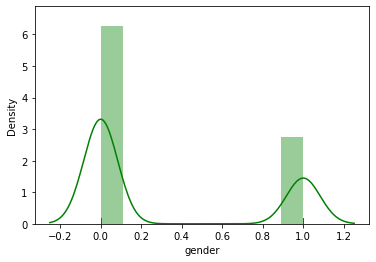

In [90]:
sns.distplot(trainc['gender'], rug=True, color='green')
plt.rcParams['font.family'] = 'Malgun Gothic'

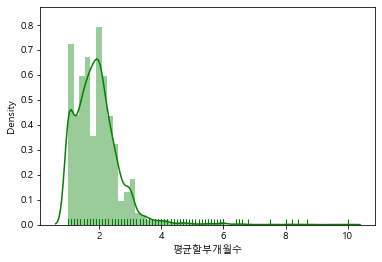

In [91]:
sns.distplot(trainc['평균할부개월수'], rug=True, color='green')
plt.rcParams['font.family'] = 'Malgun Gothic'

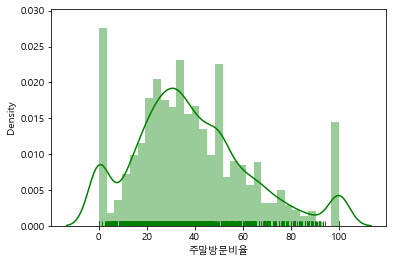

In [92]:
sns.distplot(trainc['주말방문비율'], rug=True, color='green')
plt.rcParams['font.family'] = 'Malgun Gothic'

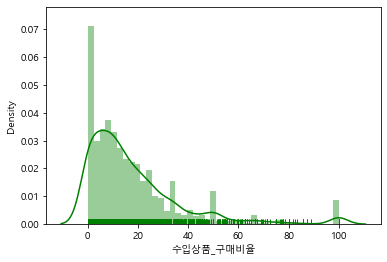

In [93]:
sns.distplot(trainc['수입상품_구매비율'], rug=True, color='green')
plt.rcParams['font.family'] = 'Malgun Gothic'

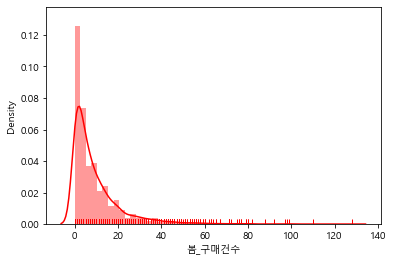

In [94]:
sns.distplot(trainc['봄_구매건수'], rug=True, color='red')
plt.rcParams['font.family'] = 'Malgun Gothic'

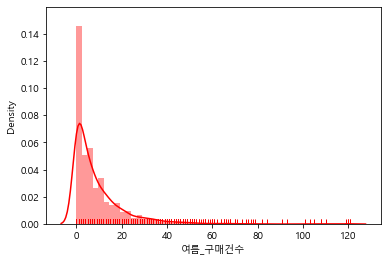

In [95]:
sns.distplot(trainc['여름_구매건수'], rug=True, color='red')
plt.rcParams['font.family'] = 'Malgun Gothic'

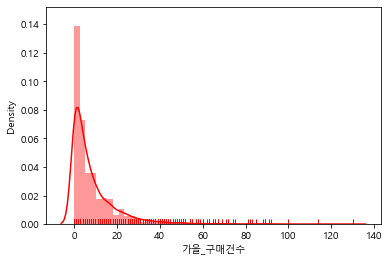

In [96]:
sns.distplot(trainc['가을_구매건수'], rug=True, color='red')
plt.rcParams['font.family'] = 'Malgun Gothic'

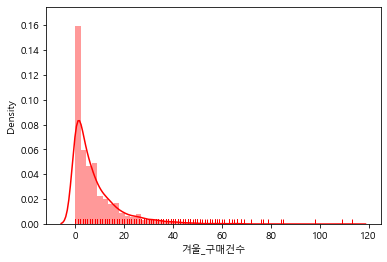

In [97]:
sns.distplot(trainc['겨울_구매건수'], rug=True, color='red')
plt.rcParams['font.family'] = 'Malgun Gothic'

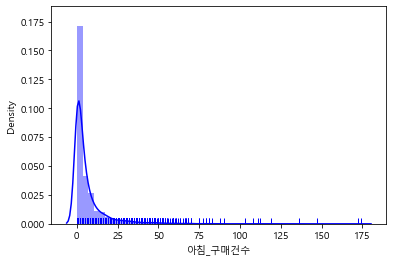

In [98]:
sns.distplot(trainc['아침_구매건수'], rug=True, color='blue')
plt.rcParams['font.family'] = 'Malgun Gothic'

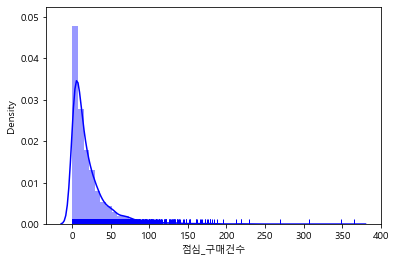

In [99]:
sns.distplot(trainc['점심_구매건수'], rug=True, color='blue')
plt.rcParams['font.family'] = 'Malgun Gothic'

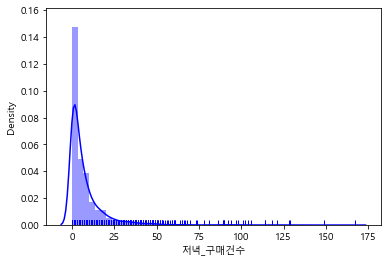

In [100]:
sns.distplot(trainc['저녁_구매건수'], rug=True, color='blue')
plt.rcParams['font.family'] = 'Malgun Gothic'

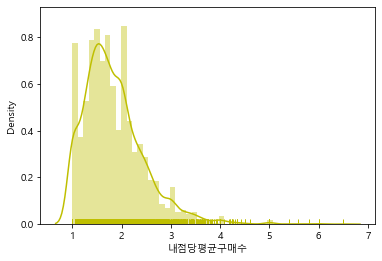

In [101]:
sns.distplot(trainc['내점당평균구매수'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

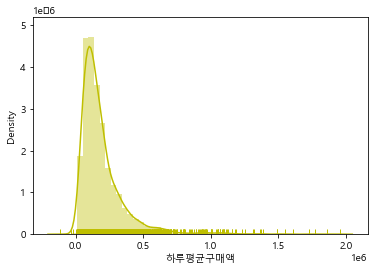

In [102]:
sns.distplot(trainc['하루평균구매액'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

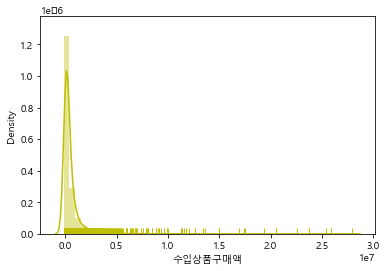

In [103]:
sns.distplot(trainc['수입상품구매액'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

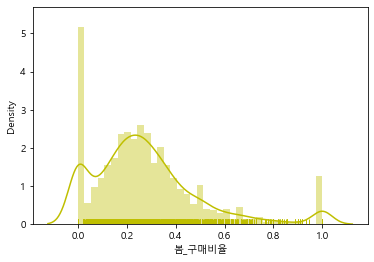

In [104]:
sns.distplot(trainc['봄_구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

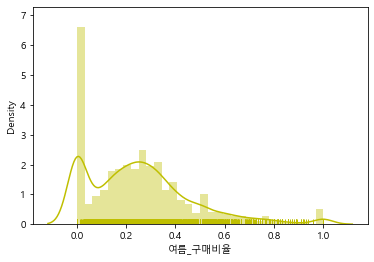

In [105]:
sns.distplot(trainc['여름_구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

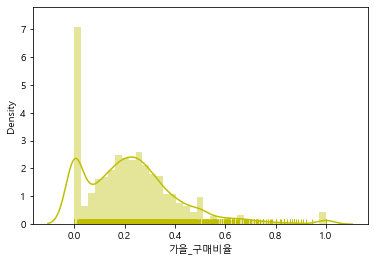

In [106]:
sns.distplot(trainc['가을_구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

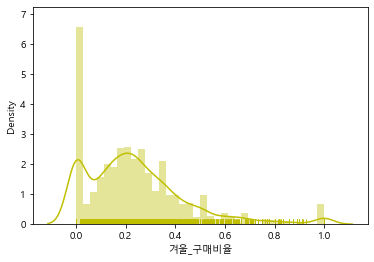

In [107]:
sns.distplot(trainc['겨울_구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

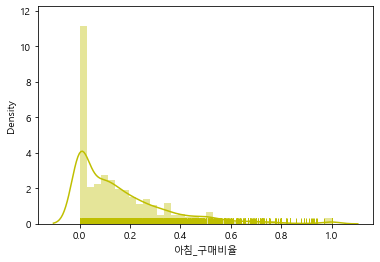

In [108]:
sns.distplot(trainc['아침_구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

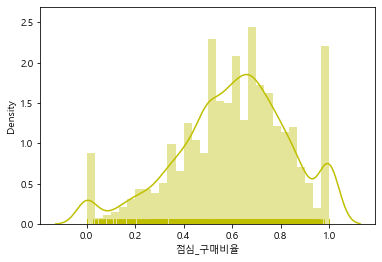

In [109]:
sns.distplot(trainc['점심_구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

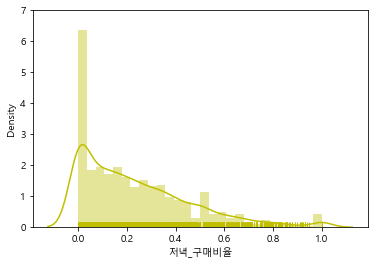

In [110]:
sns.distplot(trainc['저녁_구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

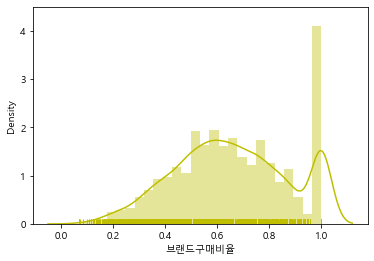

In [111]:
sns.distplot(trainc['브랜드구매비율'], rug=True, color='y')
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:>

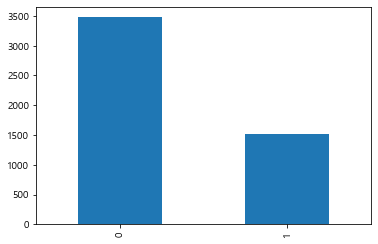

In [112]:
trainc['gender'].value_counts().plot(kind='bar')

In [113]:
trainc['gender'].value_counts() / trainc['gender'].count() * 100

0    69.58
1    30.42
Name: gender, dtype: float64

In [114]:
from sklearn.model_selection import train_test_split
dfx = trainc.drop(['gender', 'custid'], axis=1)
dfy = trainc['gender']
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.30, random_state=11)

<AxesSubplot:>

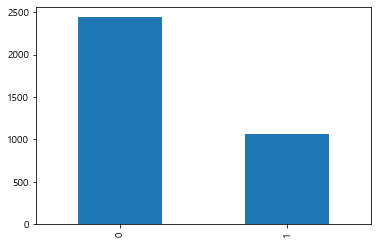

In [115]:
y_train.value_counts().plot(kind='bar')

In [116]:
y_train.value_counts() / y_train.count() * 100

0    69.742857
1    30.257143
Name: gender, dtype: float64

In [117]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
display(lr.score(x_test, y_test))

0.6926666666666667

In [118]:
#!pip install lightgbm

In [119]:
#!pip install xgboost

In [120]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance

In [121]:
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [122]:
params = {'max_depth':4,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [123]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[15:41:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.67353	eval-logloss:0.67517
[1]	train-logloss:0.65717	eval-logloss:0.66136
[2]	train-logloss:0.64322	eval-logloss:0.65015
[3]	train-logloss:0.63187	eval-logloss:0.64094
[4]	train-logloss:0.62152	eval-logloss:0.63304
[5]	train-logloss:0.61296	eval-logloss:0.62621
[6]	train-logloss:0.60509	eval-logloss:0.62057
[7]	train-logloss:0.59839	eval-logloss:0.61610
[8]	train-logloss:0.59232	eval-logloss:0.61279
[9]	train-logloss:0.58665	eval-logloss:0.60984
[10]	train-logloss:0.58188	eval-logloss:0.60723
[11]	train-logloss:0.57808	eval-logloss:0.60491
[12]	train-logloss:0.57347	eval-logloss:0

[162]	train-logloss:0.40763	eval-logloss:0.61513
[163]	train-logloss:0.40642	eval-logloss:0.61536
[164]	train-logloss:0.40543	eval-logloss:0.61554
[165]	train-logloss:0.40452	eval-logloss:0.61577
[166]	train-logloss:0.40439	eval-logloss:0.61618
[167]	train-logloss:0.40417	eval-logloss:0.61632
[168]	train-logloss:0.40305	eval-logloss:0.61640
[169]	train-logloss:0.40178	eval-logloss:0.61665
[170]	train-logloss:0.40045	eval-logloss:0.61660
[171]	train-logloss:0.39943	eval-logloss:0.61662
[172]	train-logloss:0.39890	eval-logloss:0.61677
[173]	train-logloss:0.39820	eval-logloss:0.61656
[174]	train-logloss:0.39767	eval-logloss:0.61687
[175]	train-logloss:0.39699	eval-logloss:0.61715
[176]	train-logloss:0.39581	eval-logloss:0.61746
[177]	train-logloss:0.39495	eval-logloss:0.61750
[178]	train-logloss:0.39403	eval-logloss:0.61749
[179]	train-logloss:0.39311	eval-logloss:0.61736
[180]	train-logloss:0.39252	eval-logloss:0.61764
[181]	train-logloss:0.39209	eval-logloss:0.61769
[182]	train-logloss:

[330]	train-logloss:0.30314	eval-logloss:0.64049
[331]	train-logloss:0.30253	eval-logloss:0.64066
[332]	train-logloss:0.30177	eval-logloss:0.64113
[333]	train-logloss:0.30116	eval-logloss:0.64102
[334]	train-logloss:0.30039	eval-logloss:0.64122
[335]	train-logloss:0.29985	eval-logloss:0.64183
[336]	train-logloss:0.29975	eval-logloss:0.64215
[337]	train-logloss:0.29937	eval-logloss:0.64235
[338]	train-logloss:0.29864	eval-logloss:0.64305
[339]	train-logloss:0.29847	eval-logloss:0.64315
[340]	train-logloss:0.29796	eval-logloss:0.64348
[341]	train-logloss:0.29787	eval-logloss:0.64373
[342]	train-logloss:0.29728	eval-logloss:0.64370
[343]	train-logloss:0.29688	eval-logloss:0.64359
[344]	train-logloss:0.29655	eval-logloss:0.64383
[345]	train-logloss:0.29553	eval-logloss:0.64385
[346]	train-logloss:0.29482	eval-logloss:0.64416
[347]	train-logloss:0.29382	eval-logloss:0.64440
[348]	train-logloss:0.29329	eval-logloss:0.64431
[349]	train-logloss:0.29317	eval-logloss:0.64452
[350]	train-logloss:

In [124]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.309 0.194 0.251 0.291 0.62  0.363 0.248 0.479 0.093 0.917]


In [125]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [126]:
get_clf_eval(y_test, preds)

오차행렬
[[915 123]
 [377  85]]
정확도: 0.6667, 정밀도: 0.4087, 재현율: 0.1840


In [127]:
x_train.shape

(3500, 110)

In [128]:
##### 이상치 처리

#####IQR활용

In [129]:
trainc.describe()

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25200.496600,0.304200,1.915660,17.989860,38.571880,8.248000,8.13360,9.115600,9.041200,6.175600,...,0.013600,0.018000,0.005600,0.001600,0.037600,0.001200,0.018200,0.015000,0.011200,0.241200
std,14376.680764,0.460114,0.730558,19.483598,24.509818,10.941647,10.48449,11.498917,12.190981,11.438782,...,0.115835,0.132964,0.074631,0.039972,0.190246,0.034624,0.133687,0.121565,0.105246,0.427854
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12835.750000,0.000000,1.400000,5.000000,22.200000,1.000000,1.00000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25345.000000,0.000000,1.800000,12.500000,34.850000,4.000000,5.00000,5.000000,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37584.250000,1.000000,2.200000,25.000000,50.000000,11.000000,11.00000,12.000000,12.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,49993.000000,1.000000,10.000000,100.000000,100.000000,130.000000,113.00000,128.000000,121.000000,174.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


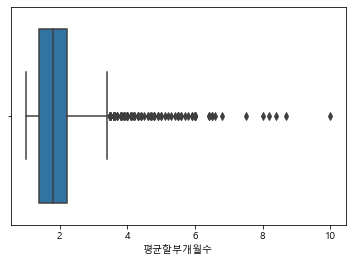

In [130]:
sns.boxplot(trainc['평균할부개월수'])
plt.show()

In [131]:
q1 = trainc['평균할부개월수'].quantile(.25)
q3 = trainc['평균할부개월수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc3 = trainc[(trainc['평균할부개월수'] > bottomrange) & (trainc['평균할부개월수'] < upperange)]
trainc3

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,50,0,2.4,0.0,50.0,7.0,7.0,8.0,14.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,49946,1,1.4,6.2,27.8,57.0,66.0,49.0,68.0,52.0,...,0,0,0,0,0,0,0,0,0,0
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


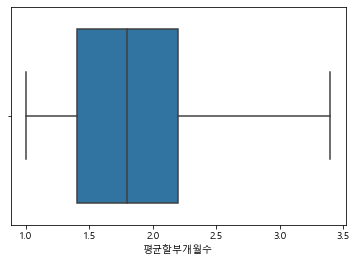

In [132]:
sns.boxplot(trainc3['평균할부개월수'])
plt.show()

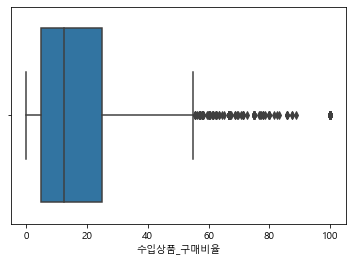

In [133]:
sns.boxplot(trainc['수입상품_구매비율'])
plt.show()

In [134]:
q1 = trainc['수입상품_구매비율'].quantile(.25)
q3 = trainc['수입상품_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc6 = trainc[(trainc['수입상품_구매비율'] > bottomrange) & (trainc['수입상품_구매비율'] < upperange)]
trainc6

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,6.0,0.0,100.0,0.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


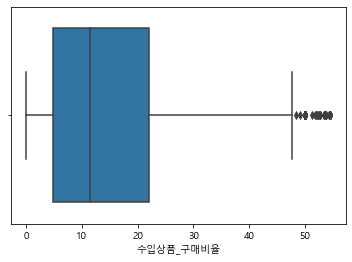

In [135]:
sns.boxplot(trainc6['수입상품_구매비율'])
plt.show()

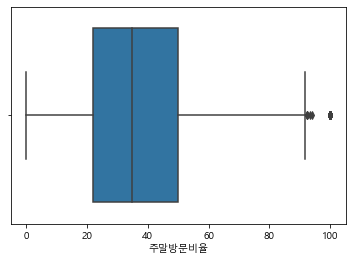

In [136]:
sns.boxplot(trainc['주말방문비율'])
plt.show()

In [137]:
q1 = trainc['주말방문비율'].quantile(.25)
q3 = trainc['주말방문비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc7 = trainc[(trainc['주말방문비율'] > bottomrange) & (trainc['주말방문비율'] < upperange)]
trainc7

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,50,0,2.4,0.0,50.0,7.0,7.0,8.0,14.0,1.0,...,0,0,0,0,0,0,0,0,0,0
6,69,0,1.7,7.1,40.0,4.0,4.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


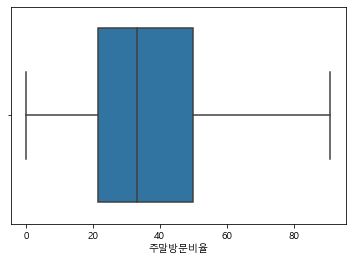

In [138]:
sns.boxplot(trainc7['주말방문비율'])
plt.show()

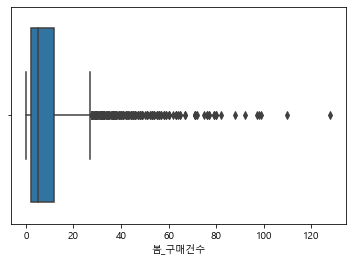

In [139]:
sns.boxplot(trainc['봄_구매건수'])
plt.show()

In [140]:
q1 = trainc['봄_구매건수'].quantile(.25)
q3 = trainc['봄_구매건수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc8 = trainc[(trainc['봄_구매건수'] > bottomrange) & (trainc['봄_구매건수'] < upperange)]
trainc8

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,6.0,0.0,100.0,0.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


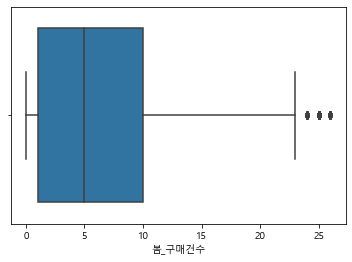

In [141]:
sns.boxplot(trainc8['봄_구매건수'])
plt.show()

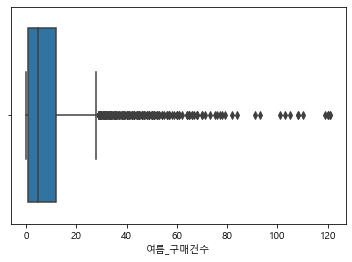

In [142]:
sns.boxplot(trainc['여름_구매건수'])
plt.show()

In [143]:
q1 = trainc['여름_구매건수'].quantile(.25)
q3 = trainc['여름_구매건수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc9 = trainc[(trainc['여름_구매건수'] > bottomrange) & (trainc['여름_구매건수'] < upperange)]
trainc9

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,6.0,0.0,100.0,0.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,49910,0,2.8,36.4,44.4,3.0,4.0,1.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


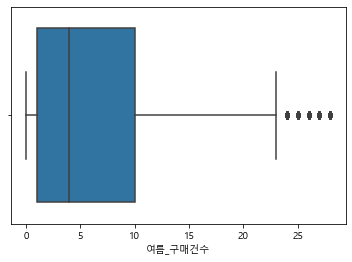

In [144]:
sns.boxplot(trainc9['여름_구매건수'])
plt.show()

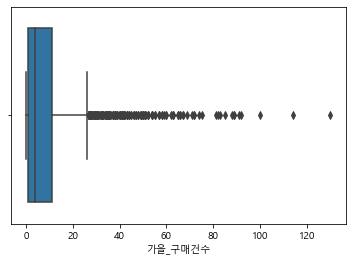

In [145]:
sns.boxplot(trainc['가을_구매건수'])
plt.show()

In [146]:
q1 = trainc['가을_구매건수'].quantile(.25)
q3 = trainc['가을_구매건수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc10 = trainc[(trainc['가을_구매건수'] > bottomrange) & (trainc['가을_구매건수'] < upperange)]
trainc10

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,6.0,0.0,100.0,0.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


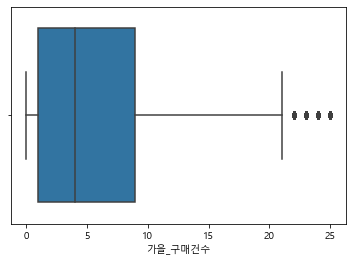

In [147]:
sns.boxplot(trainc10['가을_구매건수'])
plt.show()

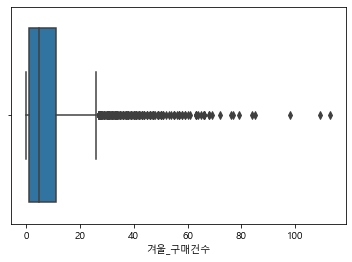

In [148]:
sns.boxplot(trainc['겨울_구매건수'])
plt.show()

In [149]:
q1 = trainc['겨울_구매건수'].quantile(.25)
q3 = trainc['겨울_구매건수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - iqr*1.5
upperange = q3 + iqr*1.5

trainc11 = trainc[(trainc['겨울_구매건수'] > bottomrange) & (trainc['겨울_구매건수'] < upperange)]
trainc11

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,6.0,0.0,100.0,0.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,49910,0,2.8,36.4,44.4,3.0,4.0,1.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


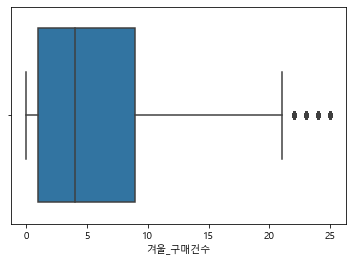

In [150]:
sns.boxplot(trainc11['겨울_구매건수'])
plt.show()

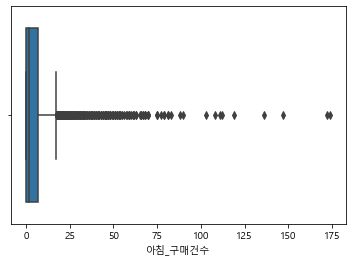

In [151]:
sns.boxplot(trainc['아침_구매건수'])
plt.show()

In [152]:
q1 = trainc['아침_구매건수'].quantile(.25)
q3 = trainc['아침_구매건수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc12 = trainc[(trainc['아침_구매건수'] > bottomrange) & (trainc['아침_구매건수'] < upperange)]
trainc12

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,6.0,0.0,100.0,0.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


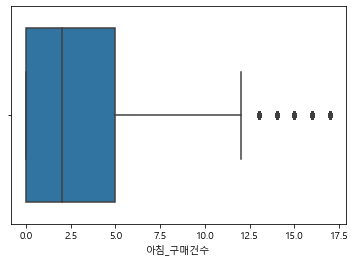

In [153]:
sns.boxplot(trainc12['아침_구매건수'])
plt.show()

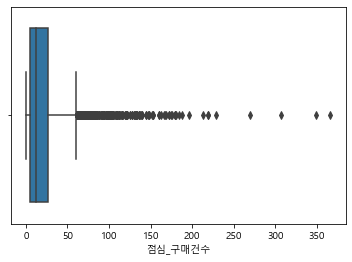

In [154]:
sns.boxplot(trainc['점심_구매건수'])
plt.show()

In [155]:
q1 = trainc['점심_구매건수'].quantile(.25)
q3 = trainc['점심_구매건수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc13 = trainc[(trainc['점심_구매건수'] > bottomrange) & (trainc['점심_구매건수'] < upperange)]
trainc13

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,6.0,0.0,100.0,0.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


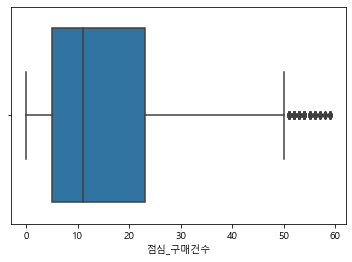

In [156]:
sns.boxplot(trainc13['점심_구매건수'])
plt.show()

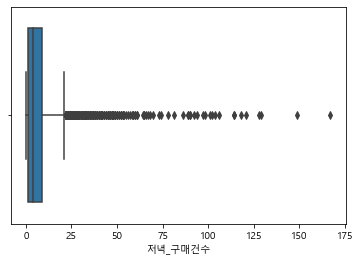

In [157]:
sns.boxplot(trainc['저녁_구매건수'])
plt.show()

In [158]:
q1 = trainc['저녁_구매건수'].quantile(.25)
q3 = trainc['저녁_구매건수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc14 = trainc[(trainc['저녁_구매건수'] > bottomrange) & (trainc['저녁_구매건수'] < upperange)]
trainc14

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,6.0,0.0,100.0,0.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,49910,0,2.8,36.4,44.4,3.0,4.0,1.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


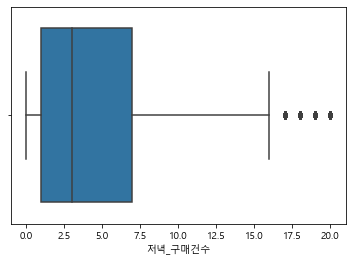

In [159]:
sns.boxplot(trainc14['저녁_구매건수'])
plt.show()

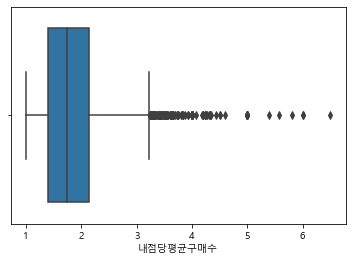

In [160]:
sns.boxplot(trainc['내점당평균구매수'])
plt.show()

In [161]:
q1 = trainc['내점당평균구매수'].quantile(.25)
q3 = trainc['내점당평균구매수'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc15 = trainc[(trainc['내점당평균구매수'] > bottomrange) & (trainc['내점당평균구매수'] < upperange)]
trainc15

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,6.0,0.0,100.0,0.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


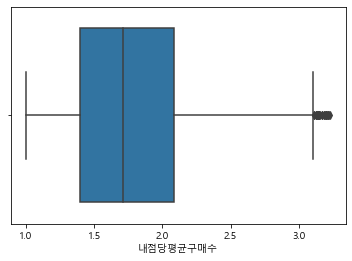

In [162]:
sns.boxplot(trainc15['내점당평균구매수'])
plt.show()

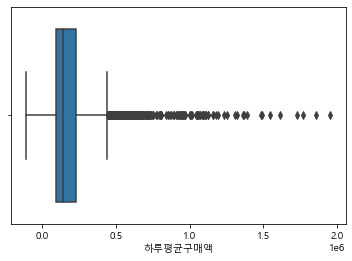

In [163]:
sns.boxplot(trainc['하루평균구매액'])
plt.show()

In [164]:
q1 = trainc['하루평균구매액'].quantile(.25)
q3 = trainc['하루평균구매액'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc16 = trainc[(trainc['하루평균구매액'] > bottomrange) & (trainc['하루평균구매액'] < upperange)]
trainc16

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,50,0,2.4,0.0,50.0,7.0,7.0,8.0,14.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


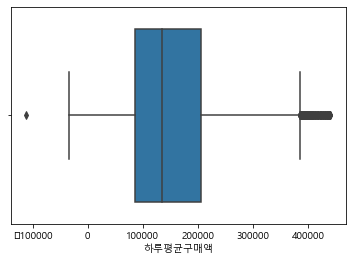

In [165]:
sns.boxplot(trainc16['하루평균구매액'])
plt.show()

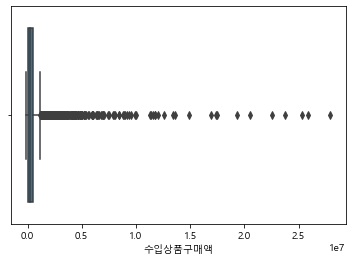

In [166]:
sns.boxplot(trainc['수입상품구매액'])
plt.show()

In [167]:
q1 = trainc['수입상품구매액'].quantile(.25)
q3 = trainc['수입상품구매액'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc17 = trainc[(trainc['수입상품구매액'] > bottomrange) & (trainc['수입상품구매액'] < upperange)]
trainc17

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,6.0,0.0,100.0,0.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,49946,1,1.4,6.2,27.8,57.0,66.0,49.0,68.0,52.0,...,0,0,0,0,0,0,0,0,0,0
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


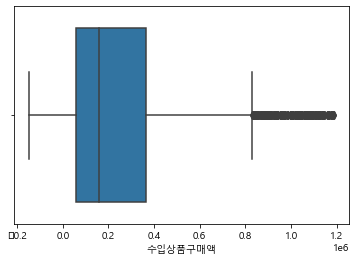

In [168]:
sns.boxplot(trainc17['수입상품구매액'])
plt.show()

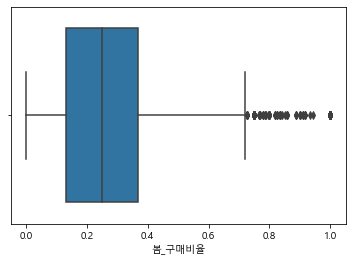

In [169]:
sns.boxplot(trainc['봄_구매비율'])
plt.show()

In [170]:
q1 = trainc['봄_구매비율'].quantile(.25)
q3 = trainc['봄_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc20 = trainc[(trainc['봄_구매비율'] > bottomrange) & (trainc['봄_구매비율'] < upperange)]
trainc20

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,50,0,2.4,0.0,50.0,7.0,7.0,8.0,14.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


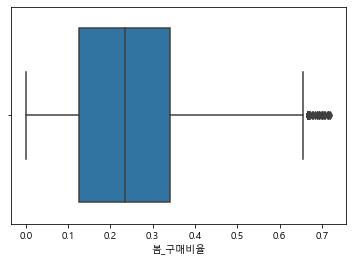

In [171]:
sns.boxplot(trainc20['봄_구매비율'])
plt.show()

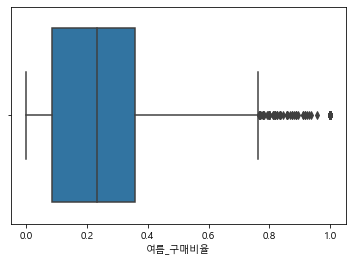

In [172]:
sns.boxplot(trainc['여름_구매비율'])
plt.show()

In [173]:
q1 = trainc['여름_구매비율'].quantile(.25)
q3 = trainc['여름_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc21 = trainc[(trainc['여름_구매비율'] > bottomrange) & (trainc['여름_구매비율'] < upperange)]
trainc21

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,6.0,0.0,100.0,0.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


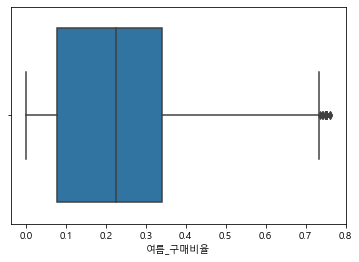

In [174]:
sns.boxplot(trainc21['여름_구매비율'])
plt.show()

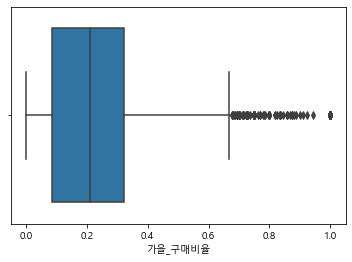

In [175]:
sns.boxplot(trainc['가을_구매비율'])
plt.show()

In [176]:
q1 = trainc['가을_구매비율'].quantile(.25)
q3 = trainc['가을_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc22 = trainc[(trainc['가을_구매비율'] > bottomrange) & (trainc['가을_구매비율'] < upperange)]
trainc22

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,6.0,0.0,100.0,0.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


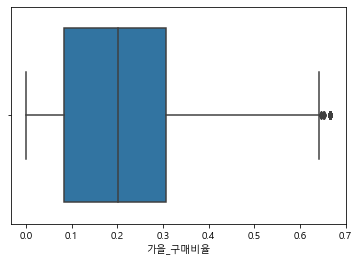

In [177]:
sns.boxplot(trainc22['가을_구매비율'])
plt.show()

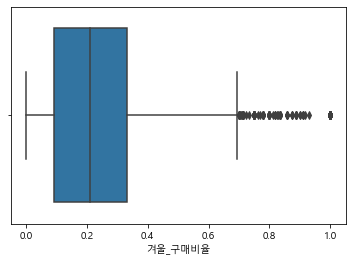

In [178]:
sns.boxplot(trainc['겨울_구매비율'])
plt.show()

In [179]:
q1 = trainc['겨울_구매비율'].quantile(.25)
q3 = trainc['겨울_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc23 = trainc[(trainc['겨울_구매비율'] > bottomrange) & (trainc['겨울_구매비율'] < upperange)]
trainc23

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,6.0,0.0,100.0,0.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


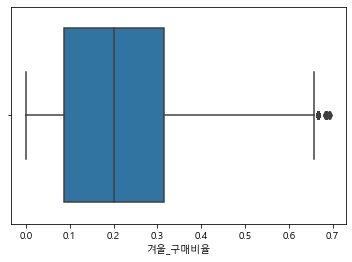

In [180]:
sns.boxplot(trainc23['겨울_구매비율'])
plt.show()

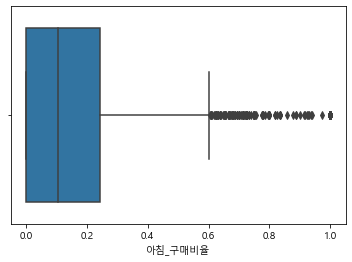

In [181]:
sns.boxplot(trainc['아침_구매비율'])
plt.show()

In [182]:
q1 = trainc['아침_구매비율'].quantile(.25)
q3 = trainc['아침_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc24 = trainc[(trainc['아침_구매비율'] > bottomrange) & (trainc['아침_구매비율'] < upperange)]
trainc24

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,6.0,0.0,100.0,0.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


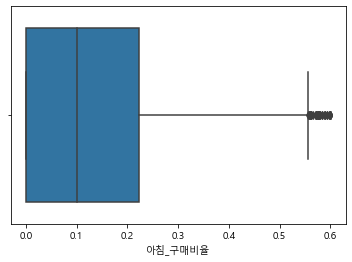

In [183]:
sns.boxplot(trainc24['아침_구매비율'])
plt.show()

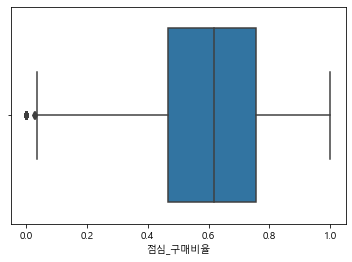

In [184]:
sns.boxplot(trainc['점심_구매비율'])
plt.show()

In [185]:
q1 = trainc['점심_구매비율'].quantile(.25)
q3 = trainc['점심_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc25 = trainc[(trainc['점심_구매비율'] > bottomrange) & (trainc['점심_구매비율'] < upperange)]
trainc25

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,50,0,2.4,0.0,50.0,7.0,7.0,8.0,14.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


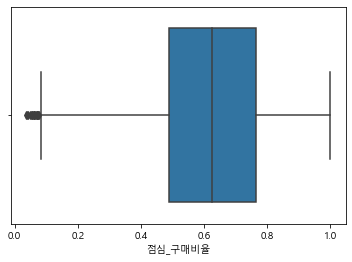

In [186]:
sns.boxplot(trainc25['점심_구매비율'])
plt.show()

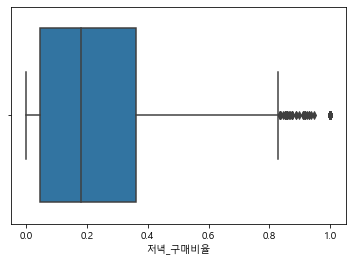

In [187]:
sns.boxplot(trainc['저녁_구매비율'])
plt.show()

In [188]:
q1 = trainc['저녁_구매비율'].quantile(.25)
q3 = trainc['저녁_구매비율'].quantile(.75)

iqr = q3 - q1

bottomrange = q1 - (iqr*1.5)
upperange = q3 + (iqr*1.5)

trainc26 = trainc[(trainc['저녁_구매비율'] > bottomrange) & (trainc['저녁_구매비율'] < upperange)]
trainc26

,custid,gender,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,1.7,26.7,100.0,0.0,9.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,1.2,11.1,37.5,0.0,5.0,4.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,2.8,5.6,37.5,7.0,17.0,12.0,0.0,10.0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,1.4,39.3,28.6,5.0,8.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,50,0,2.4,0.0,50.0,7.0,7.0,8.0,14.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,1.8,10.8,43.6,13.0,33.0,14.0,33.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,3.6,29.4,38.5,4.0,6.0,6.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,2.6,40.5,19.0,12.0,6.0,6.0,13.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,2.5,7.7,14.3,6.0,4.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


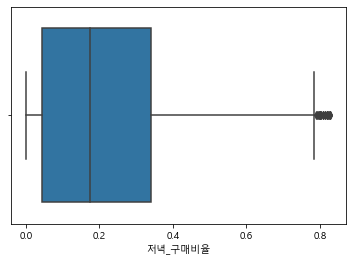

In [189]:
sns.boxplot(trainc26['저녁_구매비율'])
plt.show()

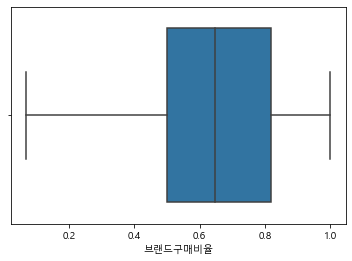

In [190]:
sns.boxplot(trainc['브랜드구매비율'])
plt.show()

In [191]:
trainc = trainc.drop(['평균할부개월수', '수입상품_구매비율', '주말방문비율', '봄_구매건수', '여름_구매건수',
                      '가을_구매건수', '겨울_구매건수', '아침_구매건수', '점심_구매건수', '저녁_구매건수',
                      '내점당평균구매수', '하루평균구매액', '하루평균구매액', '수입상품구매액', '봄_구매비율',
                      '여름_구매비율', '가을_구매비율', '겨울_구매비율', '아침_구매비율', '점심_구매비율',
                      '저녁_구매비율'], axis=1)
trainc

,custid,gender,브랜드구매비율,총구매액re_0.0,총구매액re_1.0,총구매액re_2.0,총구매액re_3.0,총구매액re_4.0,총구매액re_5.0,총구매액re_6.0,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,18,0,0.600000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,21,0,0.666667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,0.611111,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,26,0,0.535714,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,1.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,0.290323,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4996,49954,0,0.588235,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,49957,1,0.378378,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4998,49975,1,0.769231,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [192]:
trainc = pd.concat([trainc, trainc3['평균할부개월수'], trainc6['수입상품_구매비율'], trainc7['주말방문비율'],
                   trainc8['봄_구매건수'], trainc9['여름_구매건수'], trainc10['가을_구매건수'], trainc11['겨울_구매건수'],
                   trainc12['아침_구매건수'], trainc13['점심_구매건수'], trainc14['저녁_구매건수'], trainc15['내점당평균구매수'],
                   trainc16['하루평균구매액'], trainc17['수입상품구매액'], trainc20['봄_구매비율'],
                    trainc21['여름_구매비율'], trainc22['가을_구매비율'], trainc23['겨울_구매비율'],
                    trainc24['아침_구매비율'], trainc25['점심_구매비율'], trainc26['저녁_구매비율']], axis=1)
trainc

,custid,gender,브랜드구매비율,총구매액re_0.0,총구매액re_1.0,총구매액re_2.0,총구매액re_3.0,총구매액re_4.0,총구매액re_5.0,총구매액re_6.0,...,내점당평균구매수,하루평균구매액,수입상품구매액,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,아침_구매비율,점심_구매비율,저녁_구매비율
0,18,0,0.600000,1,0,0,0,0,0,0,...,1.500000,68010.000000,181586.700,0.400000,0.000000,0.000000,0.600000,0.000000,0.600000,0.400000
1,21,0,0.666667,1,0,0,0,0,0,0,...,1.125000,44181.250000,39232.950,0.444444,0.000000,0.000000,0.555556,0.333333,0.666667,0.000000
2,23,0,0.611111,0,0,0,0,0,1,0,...,2.250000,354462.500000,317598.400,0.333333,0.000000,0.194444,0.472222,0.277778,0.416667,0.305556
3,26,0,0.535714,0,1,0,0,0,0,0,...,2.000000,140285.714286,771852.000,0.535714,0.000000,0.178571,0.285714,0.000000,0.357143,0.642857
4,35,0,1.000000,1,0,0,0,0,0,0,...,2.500000,NaN,0.000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,0.290323,0,0,0,0,0,0,1,...,2.384615,170936.333333,719983.836,0.150538,0.354839,0.139785,0.354839,0.086022,0.473118,0.440860
4996,49954,0,0.588235,0,0,0,1,0,0,0,...,1.307692,239392.307692,914957.400,0.352941,0.058824,0.235294,0.352941,0.176471,0.823529,0.000000
4997,49957,1,0.378378,0,0,0,0,0,1,0,...,1.761905,278689.619048,NaN,0.162162,0.351351,0.324324,0.162162,0.432432,0.567568,0.000000
4998,49975,1,0.769231,1,0,0,0,0,0,0,...,1.857143,93499.714286,50396.346,0.153846,0.076923,0.461538,0.307692,0.000000,0.846154,0.153846


In [193]:
trainc.shape

(5000, 112)

In [194]:
trainc.isnull().sum()

custid          0
gender          0
브랜드구매비율         0
총구매액re_0.0      0
총구매액re_1.0      0
             ... 
가을_구매비율       145
겨울_구매비율       193
아침_구매비율       179
점심_구매비율       147
저녁_구매비율       117
Length: 112, dtype: int64

In [195]:
trainc = trainc.dropna()
trainc

,custid,gender,브랜드구매비율,총구매액re_0.0,총구매액re_1.0,총구매액re_2.0,총구매액re_3.0,총구매액re_4.0,총구매액re_5.0,총구매액re_6.0,...,내점당평균구매수,하루평균구매액,수입상품구매액,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,아침_구매비율,점심_구매비율,저녁_구매비율
1,21,0,0.666667,1,0,0,0,0,0,0,...,1.125000,44181.250000,39232.950,0.444444,0.000000,0.000000,0.555556,0.333333,0.666667,0.000000
2,23,0,0.611111,0,0,0,0,0,1,0,...,2.250000,354462.500000,317598.400,0.333333,0.000000,0.194444,0.472222,0.277778,0.416667,0.305556
3,26,0,0.535714,0,1,0,0,0,0,0,...,2.000000,140285.714286,771852.000,0.535714,0.000000,0.178571,0.285714,0.000000,0.357143,0.642857
5,50,0,0.750000,0,0,0,1,0,0,0,...,1.800000,179010.000000,0.000,0.222222,0.388889,0.194444,0.194444,0.027778,0.666667,0.305556
6,69,0,0.714286,1,0,0,0,0,0,0,...,1.400000,81630.000000,57957.300,0.428571,0.000000,0.285714,0.285714,0.000000,0.785714,0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,49894,0,0.384615,0,1,0,0,0,0,0,...,1.083333,115666.250000,106875.615,0.230769,0.000000,0.307692,0.461538,0.538462,0.461538,0.000000
4992,49909,0,0.666667,1,0,0,0,0,0,0,...,1.500000,230500.000000,461000.000,0.000000,0.333333,0.666667,0.000000,0.000000,0.833333,0.166667
4993,49910,0,0.727273,0,0,1,0,0,0,0,...,1.222222,262630.555556,860377.700,0.090909,0.272727,0.272727,0.363636,0.363636,0.454545,0.181818
4998,49975,1,0.769231,1,0,0,0,0,0,0,...,1.857143,93499.714286,50396.346,0.153846,0.076923,0.461538,0.307692,0.000000,0.846154,0.153846


In [196]:
trainc.isnull().sum()

custid        0
gender        0
브랜드구매비율       0
총구매액re_0.0    0
총구매액re_1.0    0
             ..
가을_구매비율       0
겨울_구매비율       0
아침_구매비율       0
점심_구매비율       0
저녁_구매비율       0
Length: 112, dtype: int64

In [197]:
from sklearn.model_selection import train_test_split
dfx = trainc.drop(['gender', 'custid'], axis=1)
dfy = trainc['gender']
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.30, random_state=11)

<AxesSubplot:>

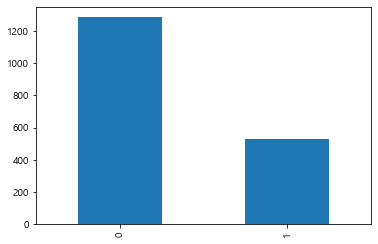

In [198]:
y_train.value_counts().plot(kind='bar')

In [199]:
y_train.value_counts() / y_train.count() * 100

0    70.798898
1    29.201102
Name: gender, dtype: float64

In [200]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
display(lr.score(x_test, y_test))

0.7326478149100257

In [201]:
##### 불균형데이터 처리를 위해 복합샘플링(SMOTE사용)

In [202]:
#!pip install imblearn

In [203]:
from sklearn.metrics import classification_report
lr0 = LogisticRegression(random_state=0)

lr0.fit(x_train, y_train)
y_pred0 = lr0.predict(x_test)

print(classification_report(y_test, y_pred0))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85       570
           1       0.00      0.00      0.00       208

    accuracy                           0.73       778
   macro avg       0.37      0.50      0.42       778
weighted avg       0.54      0.73      0.62       778



In [204]:
from imblearn.combine import *
from imblearn.combine import SMOTETomek

In [205]:
xx, yy = SMOTETomek().fit_sample(x_train, y_train)

lr0 = LogisticRegression(random_state=0)
lr0.fit(xx, yy)
y_pred0 = lr0.predict(x_test)

print(classification_report(y_test, y_pred0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       570
           1       0.27      1.00      0.42       208

    accuracy                           0.27       778
   macro avg       0.13      0.50      0.21       778
weighted avg       0.07      0.27      0.11       778



In [206]:
xx, yy = SMOTETomek(random_state=0).fit_sample(x_train, y_train)

lr1 = LogisticRegression()
lr1.fit(xx, yy)
y_pred1 = lr1.predict(x_test)

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       570
           1       0.27      1.00      0.42       208

    accuracy                           0.27       778
   macro avg       0.13      0.50      0.21       778
weighted avg       0.07      0.27      0.11       778



In [207]:
xx.shape

(2138, 110)

In [208]:
yy.shape

(2138,)

In [209]:
yy.value_counts()

1    1069
0    1069
Name: gender, dtype: int64

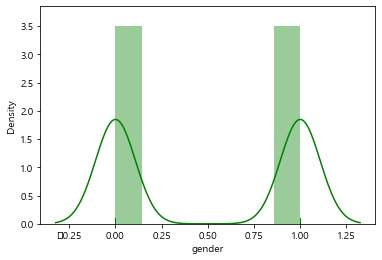

In [210]:
sns.distplot(pd.DataFrame(yy)['gender'], rug=True, color='green')
plt.rcParams['font.family'] = 'Malgun Gothic'

In [211]:
from sklearn.dummy import DummyClassifier
print(pd.DataFrame(y_train).value_counts())
DummyClassifier(strategy='most_frequent').fit(x_train, y_train).score(x_test, y_test)

gender
0         1285
1          530
dtype: int64


0.7326478149100257

In [212]:
dtrain = xgb.DMatrix(data=xx, label=yy)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [213]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [214]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[15:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.67041	eval-logloss:0.68197
[1]	train-logloss:0.65747	eval-logloss:0.67724
[2]	train-logloss:0.64625	eval-logloss:0.67212
[3]	train-logloss:0.63400	eval-logloss:0.66777
[4]	train-logloss:0.62339	eval-logloss:0.66248
[5]	train-logloss:0.61404	eval-logloss:0.65967
[6]	train-logloss:0.60743	eval-logloss:0.65731
[7]	train-logloss:0.59522	eval-logloss:0.65159
[8]	train-logloss:0.58752	eval-logloss:0.65044
[9]	train-logloss:0.58081	eval-logloss:0.64662
[10]	train-logloss:0.57375	eval-logloss:0.64380
[11]	train-logloss:0.56845	eval-logloss:0.64290
[12]	train-logloss:0.56308	eval-logloss:0

[162]	train-logloss:0.32209	eval-logloss:0.59792
[163]	train-logloss:0.32092	eval-logloss:0.59762
[164]	train-logloss:0.31966	eval-logloss:0.59761
[165]	train-logloss:0.31852	eval-logloss:0.59843
[166]	train-logloss:0.31735	eval-logloss:0.59773
[167]	train-logloss:0.31665	eval-logloss:0.59740
[168]	train-logloss:0.31585	eval-logloss:0.59731
[169]	train-logloss:0.31511	eval-logloss:0.59758
[170]	train-logloss:0.31379	eval-logloss:0.59789
[171]	train-logloss:0.31312	eval-logloss:0.59817
[172]	train-logloss:0.31275	eval-logloss:0.59825
[173]	train-logloss:0.31159	eval-logloss:0.59842
[174]	train-logloss:0.31133	eval-logloss:0.59878
[175]	train-logloss:0.31073	eval-logloss:0.59892
[176]	train-logloss:0.31040	eval-logloss:0.59884
[177]	train-logloss:0.31002	eval-logloss:0.59896
[178]	train-logloss:0.30935	eval-logloss:0.59932
[179]	train-logloss:0.30910	eval-logloss:0.59954
[180]	train-logloss:0.30856	eval-logloss:0.59974
[181]	train-logloss:0.30731	eval-logloss:0.59917
[182]	train-logloss:

[330]	train-logloss:0.22752	eval-logloss:0.60474
[331]	train-logloss:0.22689	eval-logloss:0.60506
[332]	train-logloss:0.22657	eval-logloss:0.60490
[333]	train-logloss:0.22640	eval-logloss:0.60484
[334]	train-logloss:0.22616	eval-logloss:0.60523
[335]	train-logloss:0.22580	eval-logloss:0.60509
[336]	train-logloss:0.22536	eval-logloss:0.60506
[337]	train-logloss:0.22472	eval-logloss:0.60559
[338]	train-logloss:0.22426	eval-logloss:0.60623
[339]	train-logloss:0.22404	eval-logloss:0.60674
[340]	train-logloss:0.22347	eval-logloss:0.60710
[341]	train-logloss:0.22282	eval-logloss:0.60720
[342]	train-logloss:0.22224	eval-logloss:0.60767
[343]	train-logloss:0.22189	eval-logloss:0.60808
[344]	train-logloss:0.22169	eval-logloss:0.60846
[345]	train-logloss:0.22138	eval-logloss:0.60900
[346]	train-logloss:0.22118	eval-logloss:0.60890
[347]	train-logloss:0.22096	eval-logloss:0.60918
[348]	train-logloss:0.22058	eval-logloss:0.60896
[349]	train-logloss:0.22019	eval-logloss:0.60896
[350]	train-logloss:

In [215]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.397 0.007 0.67  0.091 0.188 0.374 0.238 0.143 0.405 0.499]


In [216]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [217]:
get_clf_eval(y_test, preds)

오차행렬
[[486  84]
 [162  46]]
정확도: 0.6838, 정밀도: 0.3538, 재현율: 0.2212


In [218]:
xx.columns

Index(['브랜드구매비율', '총구매액re_0.0', '총구매액re_1.0', '총구매액re_2.0', '총구매액re_3.0',
       '총구매액re_4.0', '총구매액re_5.0', '총구매액re_6.0', '총구매액re_7.0', '총구매액re_8.0',
       ...
       '내점당평균구매수', '하루평균구매액', '수입상품구매액', '봄_구매비율', '여름_구매비율', '가을_구매비율',
       '겨울_구매비율', '아침_구매비율', '점심_구매비율', '저녁_구매비율'],
      dtype='object', length=110)

In [219]:
xx.shape

(2138, 110)

In [220]:
##### Scaler 적용

In [221]:
##### MinMaxScaler

In [222]:
xxx = xx.copy()

In [223]:
yy.value_counts()

1    1069
0    1069
Name: gender, dtype: int64

In [224]:
from sklearn.preprocessing import MinMaxScaler

In [225]:
scaler = MinMaxScaler()
scaler.fit(xxx)

MinMaxScaler()

In [226]:
s = scaler.transform(xxx)
xxx = pd.DataFrame(s, columns=xxx.columns)

In [227]:
xxx.shape

(2138, 110)

In [228]:
from sklearn.svm import SVC
svm = SVC(C=50)
svm.fit(xxx, yy).score(x_test, y_test)

0.7326478149100257

In [229]:
xxx

,브랜드구매비율,총구매액re_0.0,총구매액re_1.0,총구매액re_2.0,총구매액re_3.0,총구매액re_4.0,총구매액re_5.0,총구매액re_6.0,총구매액re_7.0,총구매액re_8.0,...,내점당평균구매수,하루평균구매액,수입상품구매액,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,아침_구매비율,점심_구매비율,저녁_구매비율
0,0.627451,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.421907,0.592194,0.358720,0.547138,0.517045,0.045455,0.262626,0.353535,0.644444,0.148148
1,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.224138,0.518844,0.196715,0.462963,0.000000,0.000000,0.962963,0.000000,0.288889,0.814815
2,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.358621,0.527293,0.184174,0.462963,0.437500,0.333333,0.160494,0.000000,0.644444,0.407407
3,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.291555,0.109807,0.694444,0.656250,0.000000,0.000000,0.000000,0.733333,0.305556
4,0.790441,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.448276,0.706429,0.213102,0.390625,0.287109,0.328125,0.406250,0.000000,0.833333,0.190972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,0.554666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.559136,0.537692,0.370048,0.397422,0.188342,0.000000,0.823850,0.378488,0.277418,0.550400
2134,0.521649,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.129646,0.297855,0.109807,0.384537,0.379645,0.509135,0.136438,0.409314,0.624072,0.130587
2135,0.335300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.186160,0.315277,0.142378,0.296519,0.264037,0.457486,0.404943,0.127079,0.869871,0.055915
2136,0.698279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.280200,0.542993,0.109807,0.679952,0.256067,0.279723,0.186122,0.145191,0.708164,0.227922


In [230]:
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(), threshold=None)

In [231]:
xxx_fs = select.fit(xxx, yy).transform(xxx)
print('x_train_std.shape: {}, x_train_fs.shape: {}'.format(xxx.shape, xxx_fs.shape))

x_train_std.shape: (2138, 110), x_train_fs.shape: (2138, 34)


In [232]:
xxx_fs

array([[0.62745098, 0.        , 0.        , ..., 0.35353535, 0.64444444,
        0.14814815],
       [1.        , 1.        , 0.        , ..., 0.        , 0.28888889,
        0.81481481],
       [1.        , 1.        , 0.        , ..., 0.        , 0.64444444,
        0.40740741],
       ...,
       [0.33529958, 0.        , 0.        , ..., 0.12707948, 0.86987062,
        0.05591497],
       [0.69827916, 0.        , 0.        , ..., 0.145191  , 0.70816368,
        0.22792238],
       [0.79091968, 1.        , 0.        , ..., 0.        , 0.91888452,
        0.09294482]])

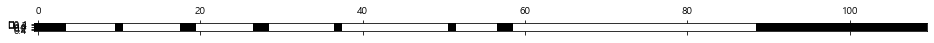

In [233]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [234]:
x_test_fs = select.transform(x_test)
svm.fit(xxx_fs, yy).score(x_test_fs, y_test)

0.7326478149100257

In [235]:
display(xxx.shape, x_test.shape)
display(yy.shape, y_test.shape)

(2138, 110)

(778, 110)

(2138,)

(778,)

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model = KNeighborsClassifier()

In [237]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xxx, yy)
scores

array([0.55841121, 0.54906542, 0.82476636, 0.85480094, 0.87119438])

In [238]:
scores = cross_val_score(model, xxx, yy, cv=5)
scores

array([0.55841121, 0.54906542, 0.82476636, 0.85480094, 0.87119438])

In [239]:
print(scores.mean())

0.7316476613626912


In [240]:
model = DecisionTreeClassifier()

In [241]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xxx, yy)
scores

array([0.55373832, 0.54906542, 0.76635514, 0.80796253, 0.80796253])

In [242]:
scores = cross_val_score(model, xxx, yy, cv=5)
scores

array([0.54205607, 0.54906542, 0.78271028, 0.80562061, 0.79156909])

In [243]:
print(scores.mean())

0.6942042942502572


In [244]:
from sklearn.model_selection import ShuffleSplit

sscv = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(model, xxx, yy, cv=sscv)
scores.mean()

0.6788587464920486

In [245]:
#from sklearn.model_selection import LeaveOneOut
#scores = cross_val_score(model, x_train, y_train, cv=LeaveOneOut())
#scores.mean()

In [246]:
param_grid = {'n_neighbors' : range(1,50),
             'weights' : ['uniform', 'distance']}
param_grid

{'n_neighbors': range(1, 50), 'weights': ['uniform', 'distance']}

In [247]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)

In [248]:
grid_search.fit(xxx, yy)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [249]:
grid_search.score(x_test, y_test), KNeighborsClassifier().fit(xxx, yy).score(x_test, y_test)

(0.7326478149100257, 0.6928020565552699)

In [250]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best CV score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 2, 'weights': 'uniform'}
Best CV score: 0.76


In [251]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
KNeighborsClassifier(n_neighbors=2)


In [252]:
#param_grid = [{'kernel': ['rbf'],
#               'C': [0.01, 0.1, 1, 10, 100],
#               'gamma': [0.01, 0.1, 1, 10, 100]},
#              {'kernel': ['linear'],
#               'C': [0.01, 0.1, 1, 10, 100]}]

In [253]:
#grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)

In [254]:
#grid = grid_search.fit(x_train_std, y_train)
#grid.score(x_test_std, y_test), SVC().fit(x_train_std, y_train).score(x_test_std, y_test)

In [255]:
#print("Best parameters: {}".format(grid_search.best_params_))
#print("Best CV score: {:.2f}".format(grid_search.best_score_))

In [256]:
#print("Best estimator:\n{}".format(grid_search.best_estimator_))

In [257]:
from scipy.stats import uniform as sp_rand
from scipy.stats import randint as sp_randint

param_grid = {'n_neighbors': sp_randint(1, 100), 
              'weights': ['uniform','distance']}
param_grid

{'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen at 0x292faaed220>,
 'weights': ['uniform', 'distance']}

In [258]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, n_iter=50, random_state=1)

In [259]:
rand_search.fit(xxx, yy)

RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=50,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000292FAAED220>,
                                        'weights': ['uniform', 'distance']},
                   random_state=1)

In [260]:
rand_search.score(x_test, y_test)

0.7326478149100257

In [261]:
print("Best estimator:\n{}".format(rand_search.best_estimator_))

Best estimator:
KNeighborsClassifier(n_neighbors=2)


In [262]:
dtrain = xgb.DMatrix(data=xxx, label=yy)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [263]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [264]:
wlist = [(dtrain, 'train'),(dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[15:43:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.67041	eval-logloss:0.67842
[1]	train-logloss:0.65747	eval-logloss:0.68126
[2]	train-logloss:0.64625	eval-logloss:0.67777
[3]	train-logloss:0.63400	eval-logloss:0.67828
[4]	train-logloss:0.62339	eval-logloss:0.67489
[5]	train-logloss:0.61404	eval-logloss:0.67125
[6]	train-logloss:0.60743	eval-logloss:0.67347
[7]	train-logloss:0.59522	eval-logloss:0.66917
[8]	train-logloss:0.58752	eval-logloss:0.67106
[9]	train-logloss:0.58081	eval-logloss:0.66397
[10]	train-logloss:0.57375	eval-logloss:0.66130
[11]	train-logloss:0.56845	eval-logloss:0.65789
[12]	train-logloss:0.56308	eval-logloss:0

[162]	train-logloss:0.32209	eval-logloss:0.71065
[163]	train-logloss:0.32092	eval-logloss:0.71323
[164]	train-logloss:0.31966	eval-logloss:0.71219
[165]	train-logloss:0.31852	eval-logloss:0.71068
[166]	train-logloss:0.31735	eval-logloss:0.70997
[167]	train-logloss:0.31665	eval-logloss:0.71701
[168]	train-logloss:0.31585	eval-logloss:0.71929
[169]	train-logloss:0.31511	eval-logloss:0.72132
[170]	train-logloss:0.31379	eval-logloss:0.72063
[171]	train-logloss:0.31312	eval-logloss:0.72646
[172]	train-logloss:0.31275	eval-logloss:0.72638
[173]	train-logloss:0.31159	eval-logloss:0.73070
[174]	train-logloss:0.31133	eval-logloss:0.73116
[175]	train-logloss:0.31073	eval-logloss:0.73721
[176]	train-logloss:0.31040	eval-logloss:0.73740
[177]	train-logloss:0.31002	eval-logloss:0.73720
[178]	train-logloss:0.30935	eval-logloss:0.73555
[179]	train-logloss:0.30910	eval-logloss:0.73583
[180]	train-logloss:0.30856	eval-logloss:0.73568
[181]	train-logloss:0.30731	eval-logloss:0.73721
[182]	train-logloss:

[330]	train-logloss:0.22752	eval-logloss:0.86300
[331]	train-logloss:0.22689	eval-logloss:0.86499
[332]	train-logloss:0.22657	eval-logloss:0.86494
[333]	train-logloss:0.22640	eval-logloss:0.86426
[334]	train-logloss:0.22616	eval-logloss:0.86527
[335]	train-logloss:0.22580	eval-logloss:0.86539
[336]	train-logloss:0.22536	eval-logloss:0.86276
[337]	train-logloss:0.22472	eval-logloss:0.86168
[338]	train-logloss:0.22426	eval-logloss:0.85914
[339]	train-logloss:0.22404	eval-logloss:0.86151
[340]	train-logloss:0.22347	eval-logloss:0.86567
[341]	train-logloss:0.22282	eval-logloss:0.86516
[342]	train-logloss:0.22224	eval-logloss:0.86468
[343]	train-logloss:0.22189	eval-logloss:0.86574
[344]	train-logloss:0.22169	eval-logloss:0.86549
[345]	train-logloss:0.22138	eval-logloss:0.86566
[346]	train-logloss:0.22118	eval-logloss:0.86542
[347]	train-logloss:0.22096	eval-logloss:0.86597
[348]	train-logloss:0.22058	eval-logloss:0.87652
[349]	train-logloss:0.22019	eval-logloss:0.87652
[350]	train-logloss:

In [265]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.121 0.015 0.211 0.014 0.131 0.107 0.177 0.144 0.059 0.121]


In [266]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [267]:
get_clf_eval(y_test, preds)

오차행렬
[[561   9]
 [203   5]]
정확도: 0.7275, 정밀도: 0.3571, 재현율: 0.0240


In [268]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=200).fit(xxx, yy)
pred_lgbm = lgbm.predict(x_test)

In [269]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(xxx, yy)
pred_dummy = dummy.predict(x_test)

In [270]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=200).fit(xxx, yy)
pred_lgbm = lgbm.predict(x_test)

In [271]:
from sklearn.metrics import accuracy_score
print("Dummy model:")
print(accuracy_score(y_test, pred_dummy))
print("lightgbm:")
print(accuracy_score(y_test, pred_lgbm))

Dummy model:
0.7326478149100257
lightgbm:
0.7287917737789203


In [272]:
from sklearn.metrics import confusion_matrix
print("Dummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("lightgbm:")
print(confusion_matrix(y_test, pred_lgbm))

Dummy model:
[[570   0]
 [208   0]]
lightgbm:
[[563   7]
 [204   4]]


In [273]:
from sklearn.metrics import classification_report
print("Dummy model:")
print(classification_report(y_test, pred_dummy, 
                            target_names=["not 9", "9"]))
print("\lightgbm:")
print(classification_report(y_test, pred_lgbm, 
                            target_names=["not 9", "9"]))

Dummy model:
              precision    recall  f1-score   support

       not 9       0.73      1.00      0.85       570
           9       0.00      0.00      0.00       208

    accuracy                           0.73       778
   macro avg       0.37      0.50      0.42       778
weighted avg       0.54      0.73      0.62       778

\lightgbm:
              precision    recall  f1-score   support

       not 9       0.73      0.99      0.84       570
           9       0.36      0.02      0.04       208

    accuracy                           0.73       778
   macro avg       0.55      0.50      0.44       778
weighted avg       0.64      0.73      0.63       778



In [274]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(precisions, recalls) :
    plt.plot(recalls, precisions, color='blue')
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR curve')

In [275]:
precisions, recalls, _ = precision_recall_curve(y_test, 
                                    lgbm.predict_proba(x_test)[:,1])

In [276]:
precisions

array([0.26735219, 0.26640927, 0.26675258, 0.26709677, 0.26744186,
       0.26778784, 0.26813472, 0.26848249, 0.26753247, 0.26788036,
       0.26822917, 0.2672751 , 0.26762402, 0.26797386, 0.26832461,
       0.26736566, 0.26771654, 0.26806833, 0.26842105, 0.2687747 ,
       0.26781003, 0.2668428 , 0.26587302, 0.26622517, 0.26657825,
       0.26693227, 0.26595745, 0.26631158, 0.26666667, 0.2670227 ,
       0.26737968, 0.26773762, 0.26809651, 0.26845638, 0.2688172 ,
       0.26783311, 0.26819407, 0.26855601, 0.26891892, 0.26928281,
       0.2696477 , 0.27001357, 0.27038043, 0.2707483 , 0.27111717,
       0.27148704, 0.27185792, 0.27222982, 0.27260274, 0.27297668,
       0.27335165, 0.27372765, 0.27410468, 0.27448276, 0.27486188,
       0.27524205, 0.27423823, 0.27323162, 0.27361111, 0.27399166,
       0.27437326, 0.27475593, 0.27513966, 0.27552448, 0.27591036,
       0.27629734, 0.27668539, 0.27707454, 0.27746479, 0.27785614,
       0.27824859, 0.27864215, 0.27903683, 0.27943262, 0.27982

In [277]:
recalls

array([1.        , 0.99519231, 0.99519231, 0.99519231, 0.99519231,
       0.99519231, 0.99519231, 0.99519231, 0.99038462, 0.99038462,
       0.99038462, 0.98557692, 0.98557692, 0.98557692, 0.98557692,
       0.98076923, 0.98076923, 0.98076923, 0.98076923, 0.98076923,
       0.97596154, 0.97115385, 0.96634615, 0.96634615, 0.96634615,
       0.96634615, 0.96153846, 0.96153846, 0.96153846, 0.96153846,
       0.96153846, 0.96153846, 0.96153846, 0.96153846, 0.96153846,
       0.95673077, 0.95673077, 0.95673077, 0.95673077, 0.95673077,
       0.95673077, 0.95673077, 0.95673077, 0.95673077, 0.95673077,
       0.95673077, 0.95673077, 0.95673077, 0.95673077, 0.95673077,
       0.95673077, 0.95673077, 0.95673077, 0.95673077, 0.95673077,
       0.95673077, 0.95192308, 0.94711538, 0.94711538, 0.94711538,
       0.94711538, 0.94711538, 0.94711538, 0.94711538, 0.94711538,
       0.94711538, 0.94711538, 0.94711538, 0.94711538, 0.94711538,
       0.94711538, 0.94711538, 0.94711538, 0.94711538, 0.94711

In [278]:
_

array([1.30625869e-04, 1.70247337e-04, 2.06413298e-04, 2.09457105e-04,
       2.46610199e-04, 2.79183272e-04, 2.87957205e-04, 3.48212393e-04,
       4.15426793e-04, 4.19189027e-04, 4.63067349e-04, 4.91541928e-04,
       4.92959377e-04, 4.97772621e-04, 5.08331535e-04, 5.12077958e-04,
       5.12643179e-04, 5.16389875e-04, 5.16980244e-04, 5.22560953e-04,
       5.37858936e-04, 5.42400772e-04, 5.55156740e-04, 5.64501589e-04,
       5.93298016e-04, 5.96293668e-04, 5.99974383e-04, 6.01681773e-04,
       6.10417425e-04, 6.18842185e-04, 6.31214540e-04, 6.61124830e-04,
       6.75454325e-04, 6.76359400e-04, 6.88391550e-04, 7.09320266e-04,
       7.37815120e-04, 7.39846272e-04, 7.85884445e-04, 7.88042645e-04,
       7.93475046e-04, 7.96320218e-04, 8.41708465e-04, 8.47602583e-04,
       8.54320044e-04, 8.92068180e-04, 9.04500862e-04, 9.32489249e-04,
       9.47044855e-04, 9.49494551e-04, 9.53431549e-04, 9.62222353e-04,
       9.66187140e-04, 9.76736672e-04, 9.90194556e-04, 1.01165604e-03,
      

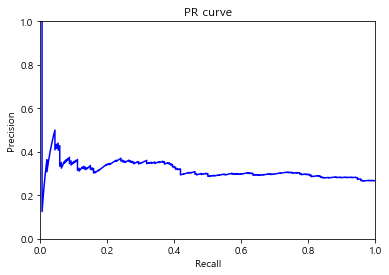

In [279]:
plot_precision_recall_curve(precisions, recalls)

In [280]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [281]:
fpr, tpr, _ = roc_curve(y_test, lgbm.predict_proba(x_test)[:,1])
auc(fpr, tpr)

0.5702091767881241

In [282]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

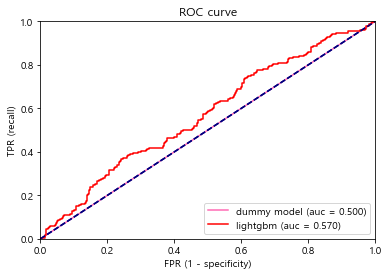

In [283]:
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, 
                                    dummy.predict_proba(x_test)[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, 
                                  lgbm.predict_proba(x_test)[:,1])
plot_roc_curve(fpr_lgbm, tpr_lgbm, 'lightgbm', 'red')

In [284]:
best_model = lgbm
best_model.score(x_test, y_test)

0.7287917737789203

In [285]:
from sklearn.dummy import DummyClassifier
print(y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(xxx, yy).score(x_test, y_test)

0    570
1    208
Name: gender, dtype: int64


0.7326478149100257

In [286]:
testc.head()

,custid,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,100001,2.2,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,100002,1.3,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2,100003,1.8,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,100004,1.7,37.0,50.0,5.0,15.0,9.0,17.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,100005,2.3,11.5,22.2,18.0,0.0,5.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [287]:
testcc = testc.copy()
testcc.head()

,custid,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,100001,2.2,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,100002,1.3,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2,100003,1.8,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,100004,1.7,37.0,50.0,5.0,15.0,9.0,17.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,100005,2.3,11.5,22.2,18.0,0.0,5.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [288]:
testcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 111 entries, custid to 주구매코너_화장품
dtypes: float64(21), int64(1), uint8(89)
memory usage: 1.3 MB


In [289]:
testcc.isnull().sum()

custid            0
평균할부개월수           0
수입상품_구매비율         0
주말방문비율            0
가을_구매건수           0
                 ..
주구매코너_타운모피        0
주구매코너_트래디셔널캐주얼    0
주구매코너_피혁A         0
주구매코너_피혁B         0
주구매코너_화장품         0
Length: 111, dtype: int64

In [290]:
testcc

,custid,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,...,주구매코너_장신구,주구매코너_정장셔츠,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품
0,100001,2.2,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,100002,1.3,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2,100003,1.8,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,100004,1.7,37.0,50.0,5.0,15.0,9.0,17.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,100005,2.3,11.5,22.2,18.0,0.0,5.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,104996,1.4,0.0,75.0,1.0,2.0,2.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4996,104997,1.8,7.7,42.9,0.0,5.0,1.0,7.0,0.0,3.0,...,0,0,1,0,0,0,0,0,0,0
4997,104998,1.8,0.0,42.9,4.0,1.0,6.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4998,104999,1.7,14.3,55.6,0.0,7.0,4.0,3.0,2.0,4.0,...,0,0,0,0,0,0,0,0,0,1


In [291]:
testcc['pred'] = lgbm.predict(testcc.loc[:, '평균할부개월수':'주구매코너_화장품'])

In [294]:
print(best_model.predict_proba(testcc.loc[:, '평균할부개월수':'주구매코너_화장품']))
testcc['pred_prob'] = best_model.predict_proba(testcc.loc[:, '평균할부개월수':'주구매코너_화장품'])[:,1]
testcc.head()

[[0.99395785 0.00604215]
 [0.99592248 0.00407752]
 [0.99666658 0.00333342]
 ...
 [0.99845687 0.00154313]
 [0.99670343 0.00329657]
 [0.98826111 0.01173889]]


,custid,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,...,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품,pred,pred_prob
0,100001,2.2,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,...,0,0,0,0,0,0,0,0,0,0.006042
1,100002,1.3,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,...,0,0,0,0,0,0,0,0,0,0.004078
2,100003,1.8,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0.003333
3,100004,1.7,37.0,50.0,5.0,15.0,9.0,17.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0.009468
4,100005,2.3,11.5,22.2,18.0,0.0,5.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.002184


In [295]:
target = testcc.query('pred == 1 & pred_prob > 0.7')
target.sort_values(by="pred_prob", ascending=False).to_csv("department_pred.csv", index=False)
pd.read_csv("department_pred.csv")

,custid,평균할부개월수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,...,주구매코너_조리욕실,주구매코너_침구수예,주구매코너_캐릭터캐주얼,주구매코너_타운모피,주구매코너_트래디셔널캐주얼,주구매코너_피혁A,주구매코너_피혁B,주구매코너_화장품,pred,pred_prob
0,103383,1.7,17.4,58.8,0.0,1.0,13.0,9.0,2.0,13.0,...,0,0,0,0,0,0,0,0,1,0.781109
